In [194]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
%matplotlib notebook

import sys
sys.path.append('/Users/Serene/calour')
import calour as cl
import numpy as np
import pandas as pd
import calour.cahelper as cah
import calour.analysis

from scipy.stats import sem
import pickle

In [142]:
cl.set_log_level(40) # get rid of warnings in calour

In [195]:
with open("fdrmethods_datasets.pkl", "wb") as f:
    pickle.dump((ds1_gcd, bh1_gcd, ds1_dibd, bh1_dibd, ds1_sps, bh1_sps,
                ds1_cfs, bh1_cfs, ds1_shs, bh1_shs, ds1_mlt, bh1_mlt,
                ds1_cs, bh1_cs, ds1_dme, bh1_dme, ds1_ukt, bh1_ukt,
                ds4_ag, bh4_ag, ds5_ag, bh5_ag), f)

## reason for not including filterBH:
 1. shown in simulation already that DSFDR works better
 2. filterBH has similar result sometimes as DSFDR; as permutation varies, results flucates
 3. if need to include filterBH, has to re-calculate a good number of times

## Gevers' CD data set (Qiita ID: 1939)

In [2]:
gcd = cl.read_taxa('data/gcd.biom','data/gcd.map.txt', sparse=False, filter_orig_reads=1000)
gcd_sub1 = gcd.filter_min_abundance(5)

In [127]:
gcd_sub1

AmpliconExperiment gcd.biom with 1339 samples, 5153 features

In [3]:
ds1_gcd = gcd_sub1.diff_abundance('diagnosis', 'CD', 'no', fdr_method='dsfdr')
bh1_gcd = gcd_sub1.diff_abundance('diagnosis', 'CD', 'no', fdr_method='bhfdr')
#fbh1_gcd = gcd_sub1.diff_abundance('diagnosis', 'CD', 'no', fdr_method='filterBH')

In [4]:
sig_ds1_gcd = len(ds1_gcd.feature_metadata.index)
sig_bh1_gcd = len(bh1_gcd.feature_metadata.index)
#sig_fbh1_gcd = len(fbh1_gcd.feature_metadata.index)

In [5]:
#x = range(3)
#sig1_gcd = np.hstack([sig_ds1_gcd, sig_bh1_gcd, sig_fbh1_gcd])
x = range(2)
sig1_gcd = np.hstack([sig_ds1_gcd, sig_bh1_gcd])
print(sig1_gcd)

[1099 1010]


<IPython.core.display.Javascript object>


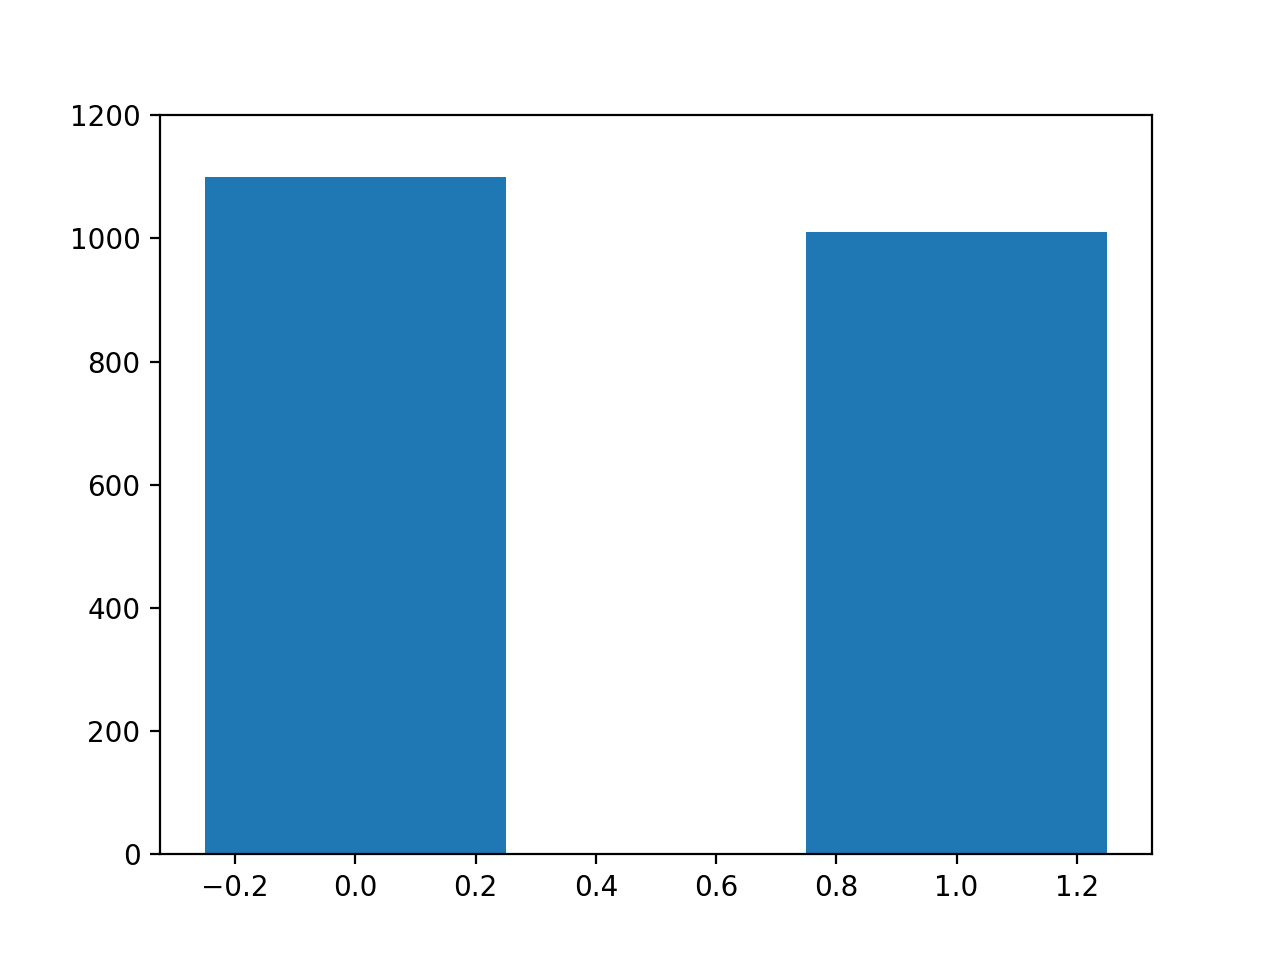

(0, 1200)

In [6]:
plt.figure()
plt.bar(x, sig1_gcd, width=0.5)
pylab.ylim([0, 1200])

<IPython.core.display.Javascript object>


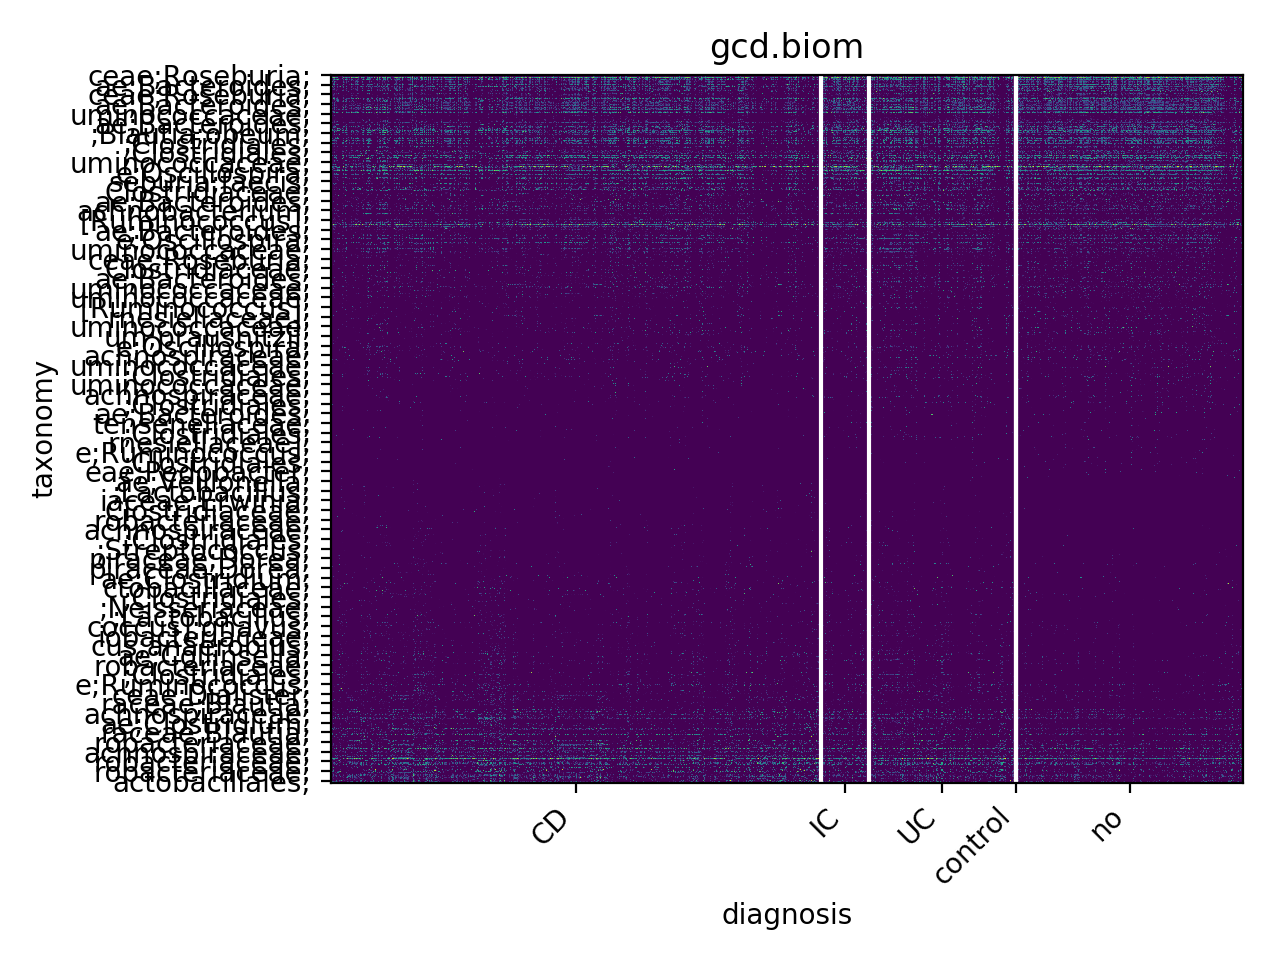

In [7]:
ds1_gcd.plot_sort('diagnosis', databases=[], gui='jupyter')

<IPython.core.display.Javascript object>


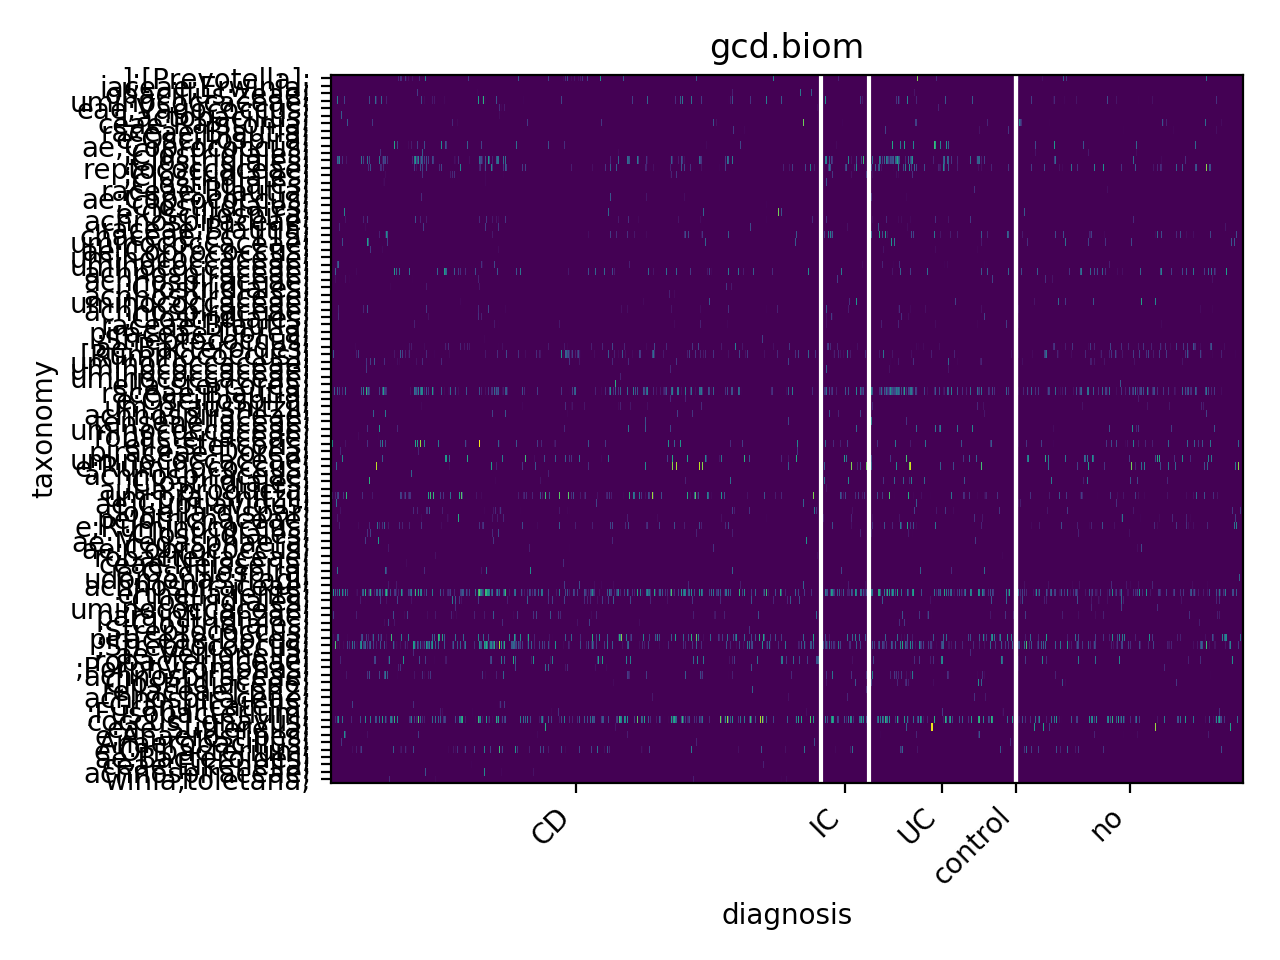

In [8]:
more = ds1_gcd.feature_metadata.index.difference(bh1_gcd.feature_metadata.index)
more = ds1_gcd.filter_ids(more.values)
more.plot_sort('diagnosis', databases=[], gui='jupyter')

## Dog IBD (Qiita ID: 833)

In [10]:
dibd = cl.read_taxa('data/dibd.biom','data/dibd.map.txt', sparse=False, filter_orig_reads=1000)
dibd_sub1 = dibd.filter_min_abundance(5)

In [11]:
ds1_dibd = dibd_sub1.diff_abundance('disease_stat','IBD','healthy', fdr_method='dsfdr')
bh1_dibd = dibd_sub1.diff_abundance('disease_stat','IBD','healthy', fdr_method='bhfdr')
#fbh1_dibd = dibd_sub1.diff_abundance('disease_stat','IBD','healthy', fdr_method='filterBH')

In [12]:
sig_ds1_dibd = len(ds1_dibd.feature_metadata.index)
sig_bh1_dibd = len(bh1_dibd.feature_metadata.index)
#sig_fbh1_dibd = len(fbh1_dibd.feature_metadata.index)

In [13]:
#x = range(3)
#sig1_dibd = np.hstack([sig_ds1_dibd, sig_bh1_dibd, sig_fbh1_dibd])
x = range(2)
sig1_dibd = np.hstack([sig_ds1_dibd, sig_bh1_dibd])
print(sig1_dibd)

[123  94]


<IPython.core.display.Javascript object>


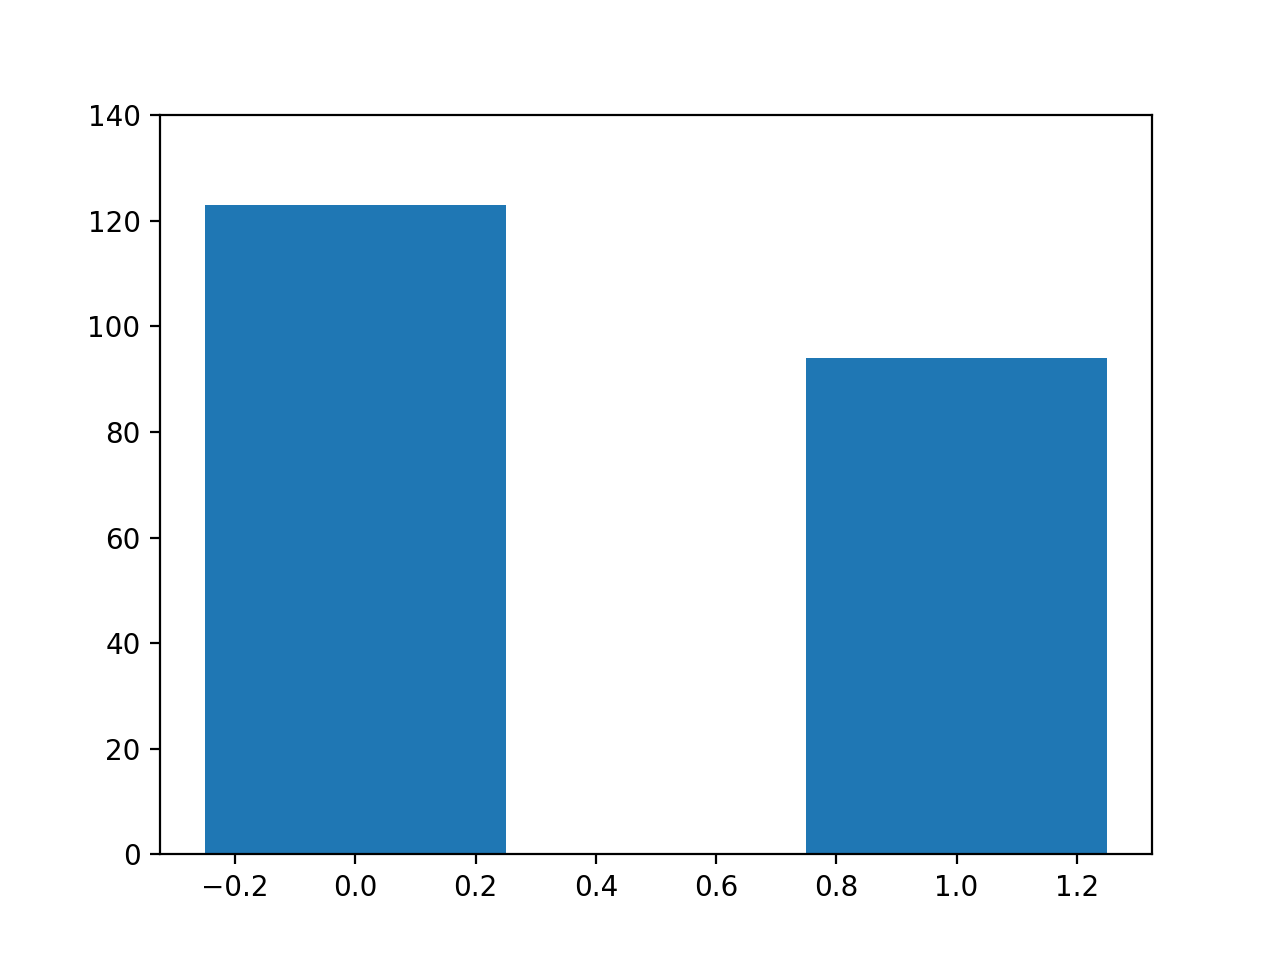

(0, 140)

In [14]:
plt.figure()
plt.bar(x, sig1_dibd, width=0.5)
pylab.ylim([0, 140])

<IPython.core.display.Javascript object>


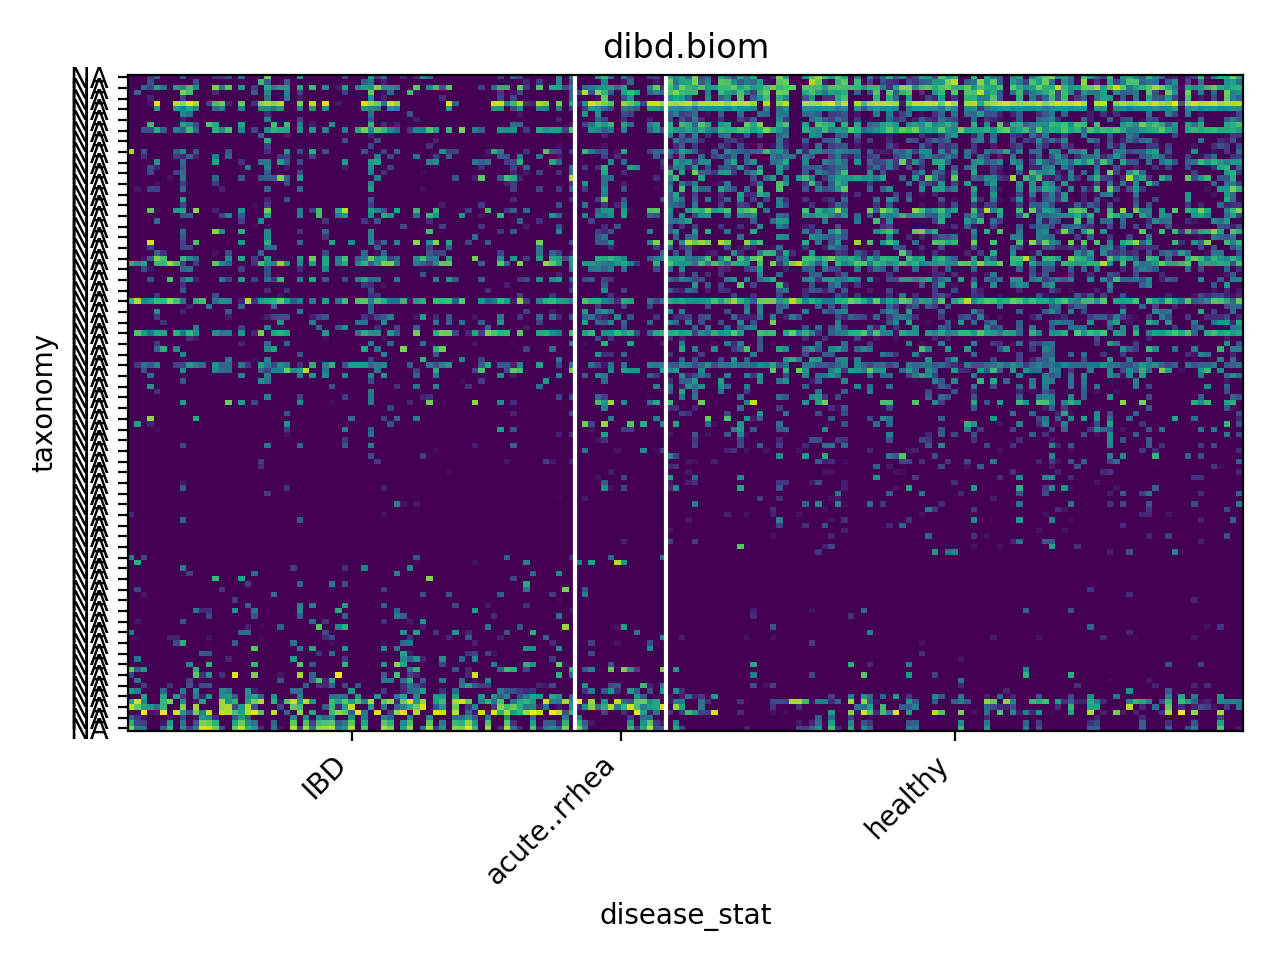

In [15]:
ds1_dibd.plot_sort('disease_stat', databases=[],gui='jupyter')

<IPython.core.display.Javascript object>


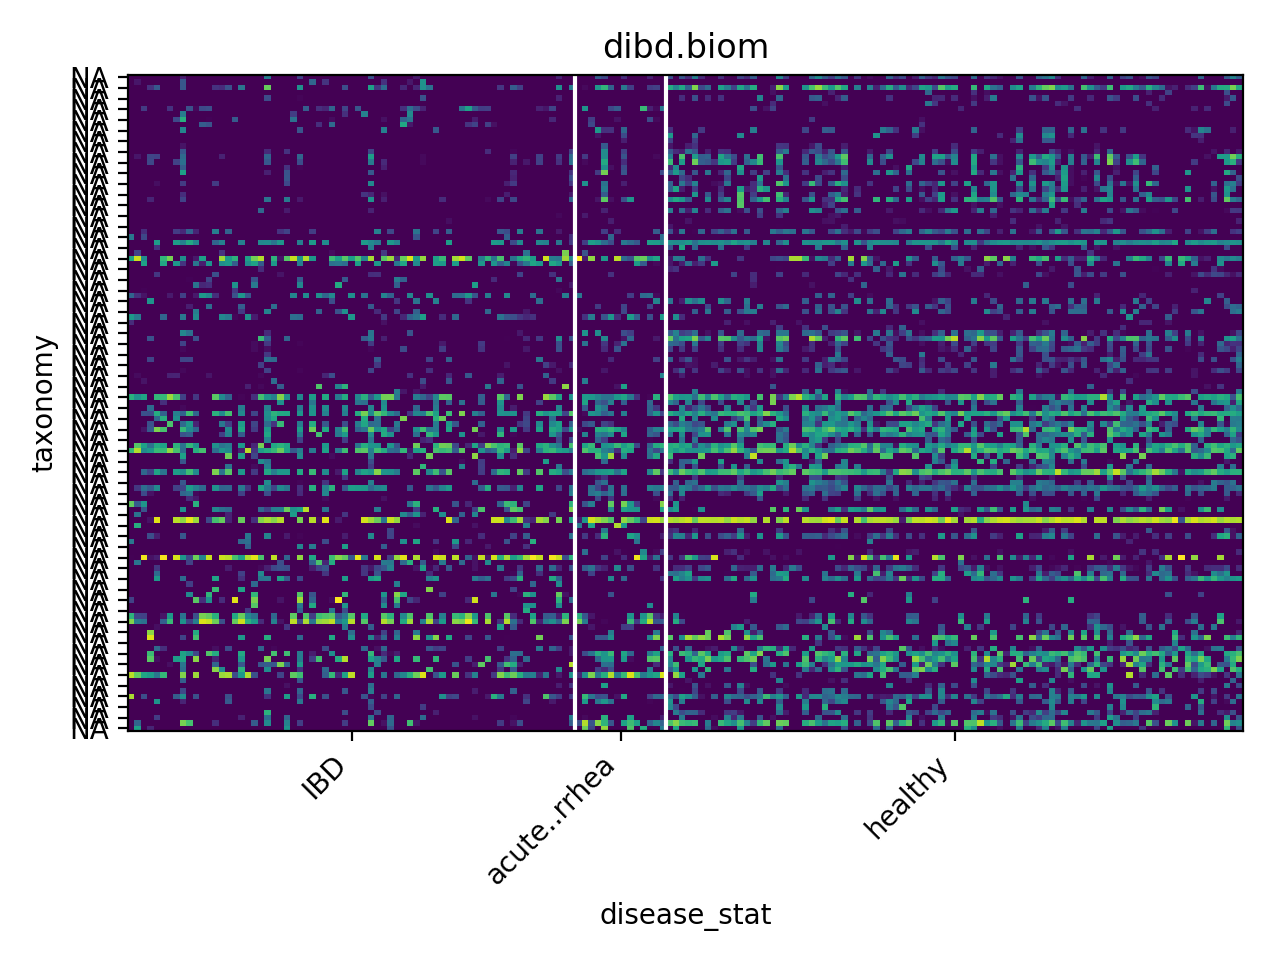

In [16]:
more = ds1_dibd.feature_metadata.index.difference(bh1_gcd.feature_metadata.index)
more = ds1_dibd.filter_ids(more.values)
more.plot_sort('disease_stat', databases=[], gui='jupyter')

## soil plant selenium (Qiita ID: 10363)

In [17]:
sps = cl.read_taxa('data/sps.biom','data/sps.map.txt', sparse=False, filter_orig_reads=1000)
sps_sub1 = sps.filter_min_abundance(5)

In [18]:
ds1_sps = sps_sub1.diff_abundance('seleniferous','TRUE','FALSE', fdr_method='dsfdr')
bh1_sps = sps_sub1.diff_abundance('seleniferous','TRUE','FALSE', fdr_method='bhfdr')
#fbh1_sps = sps_sub1.diff_abundance('seleniferous','TRUE','FALSE', fdr_method='filterBH')

In [19]:
sig_ds1_sps = len(ds1_sps.feature_metadata.index)
sig_bh1_sps = len(bh1_sps.feature_metadata.index)
#sig_fbh1_sps = len(fbh1_sps.feature_metadata.index)

In [21]:
#x = range(3)
#sig1_sps = np.hstack([sig_ds1_sps, sig_bh1_sps, sig_fbh1_sps])
sig1_sps = np.hstack([sig_ds1_sps, sig_bh1_sps])
x = range(2)
print(sig1_sps)

[6356 5835]


<IPython.core.display.Javascript object>


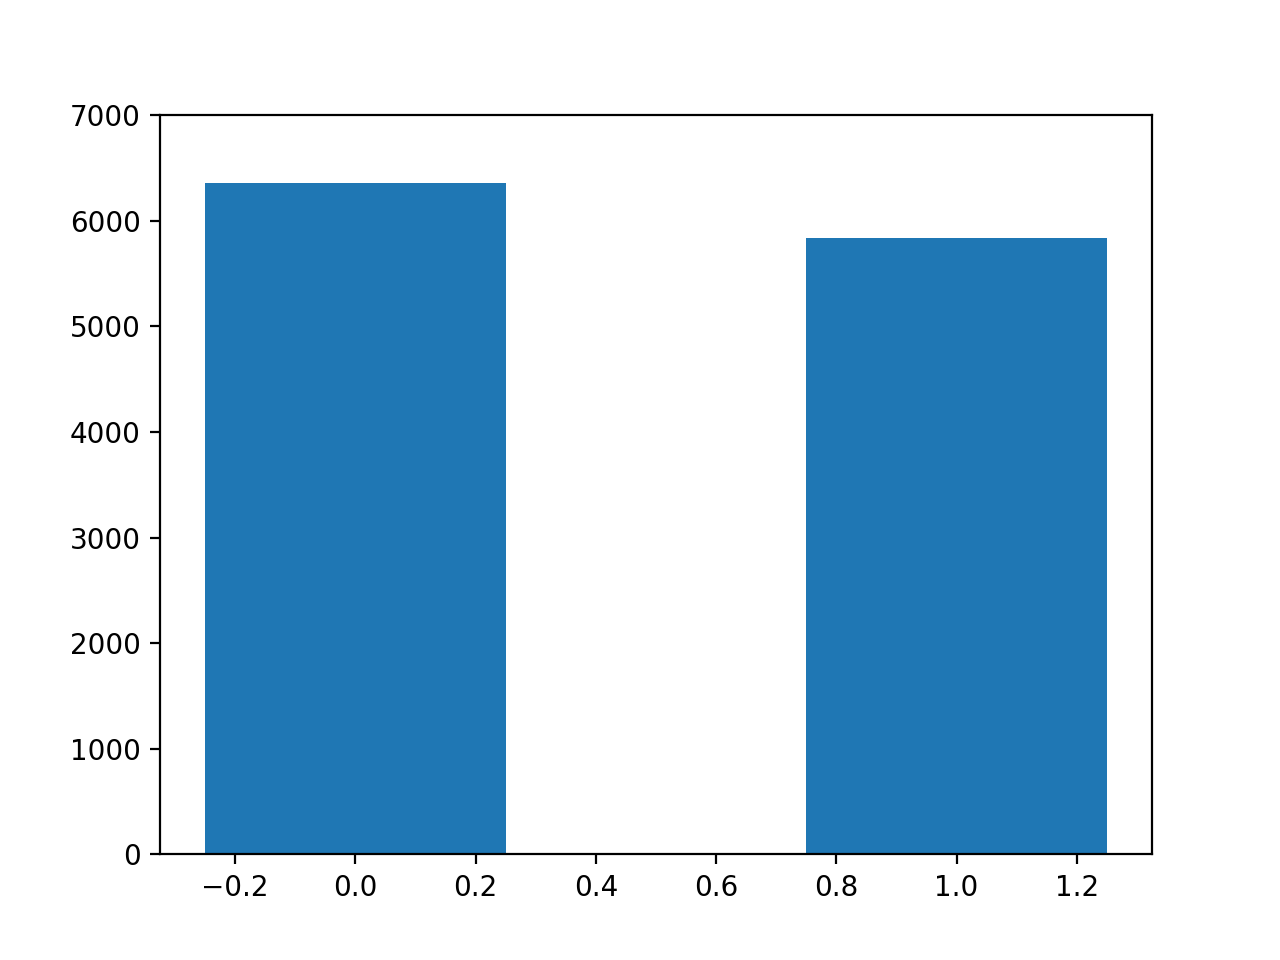

(0, 7000)

In [22]:
plt.figure()
plt.bar(x, sig1_sps, width=0.5)
pylab.ylim([0, 7000])

<IPython.core.display.Javascript object>


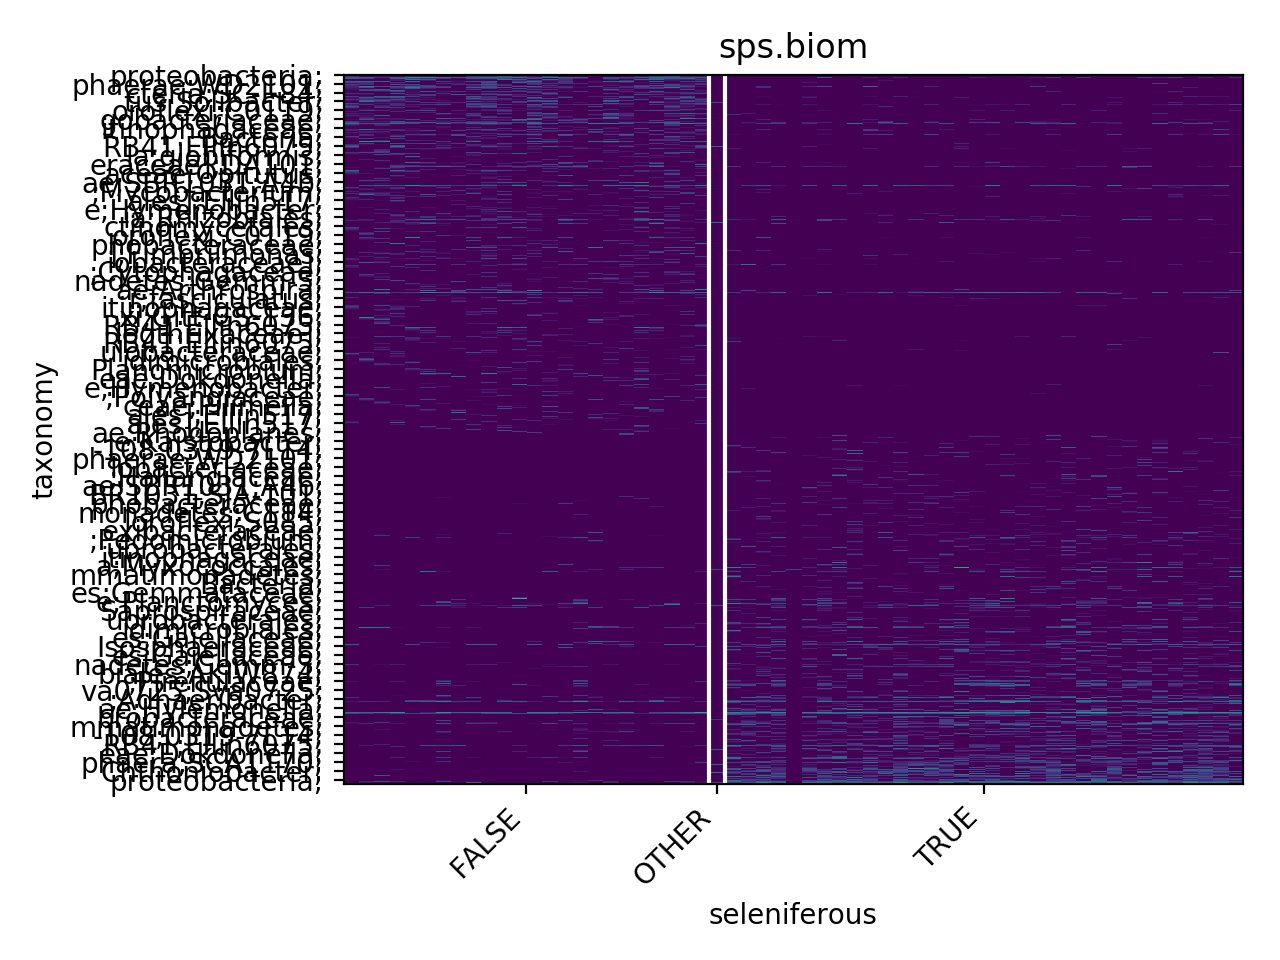

In [23]:
ds1_sps.plot_sort('seleniferous', databases=[],gui='jupyter')

<IPython.core.display.Javascript object>


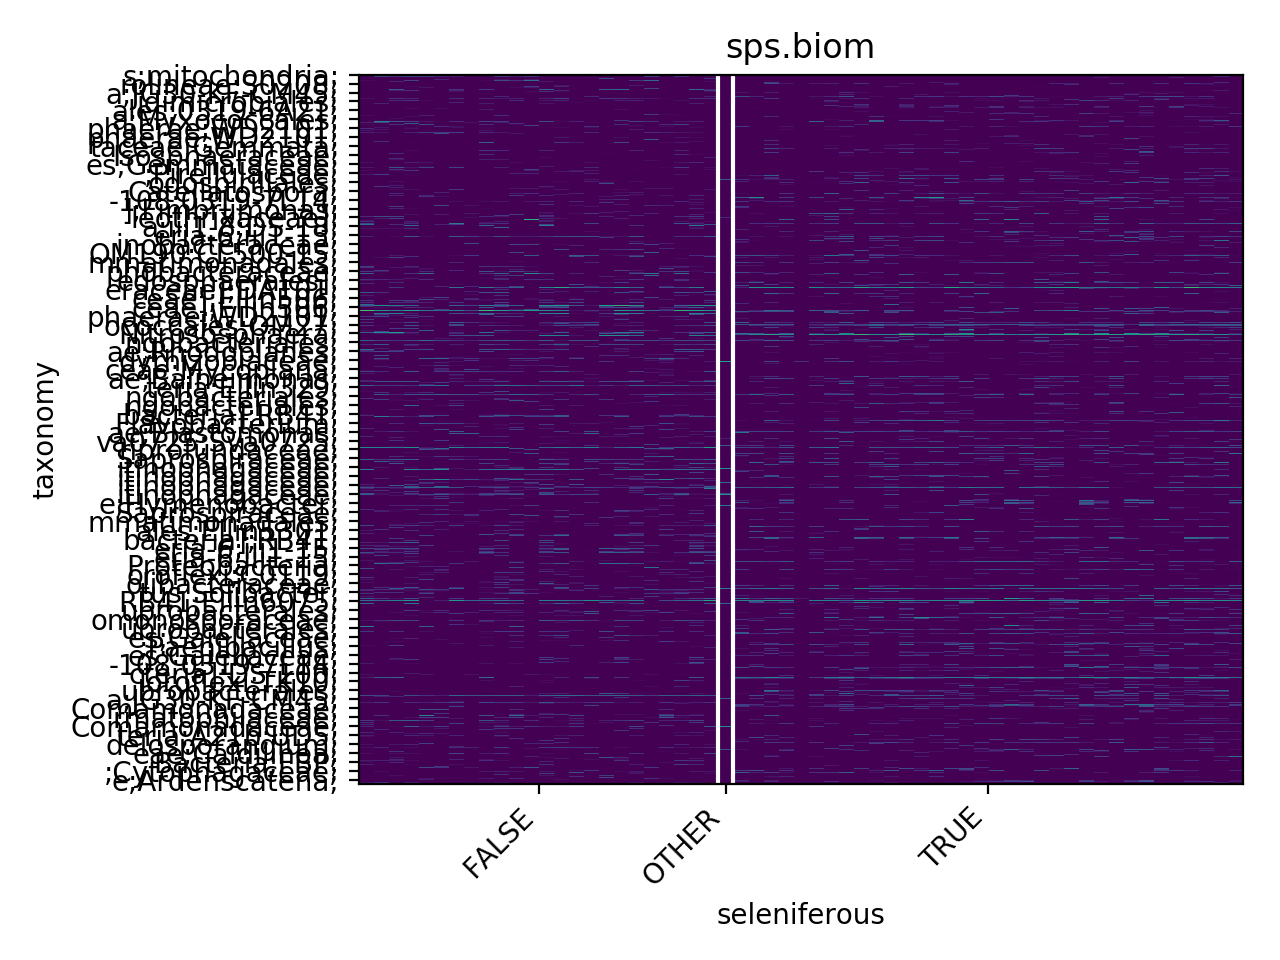

In [24]:
more = ds1_sps.feature_metadata.index.difference(bh1_gcd.feature_metadata.index)
more = ds1_sps.filter_ids(more.values)
more.plot_sort('seleniferous', databases=[], gui='jupyter')

## CFS data 

In [25]:
cfs = cl.read_taxa('data/cfs.biom','data/cfs.map.txt', sparse=False, filter_orig_reads=1000)
cfs_sub1 = cfs.filter_min_abundance(5)

In [26]:
ds1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='dsfdr')
bh1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='bhfdr')
#fbh1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='filterBH')

In [27]:
sig_ds1_cfs = len(ds1_cfs.feature_metadata.index)
sig_bh1_cfs = len(bh1_cfs.feature_metadata.index)
#sig_fbh1_cfs = len(fbh1_cfs.feature_metadata.index)

In [28]:
#x = range(3)
#sig1_cfs = np.hstack([sig_ds1_cfs, sig_bh1_cfs, sig_fbh1_cfs])
x = range(2)
sig1_cfs = np.hstack([sig_ds1_cfs, sig_bh1_cfs])
print(sig1_cfs)

[61 16]


<IPython.core.display.Javascript object>


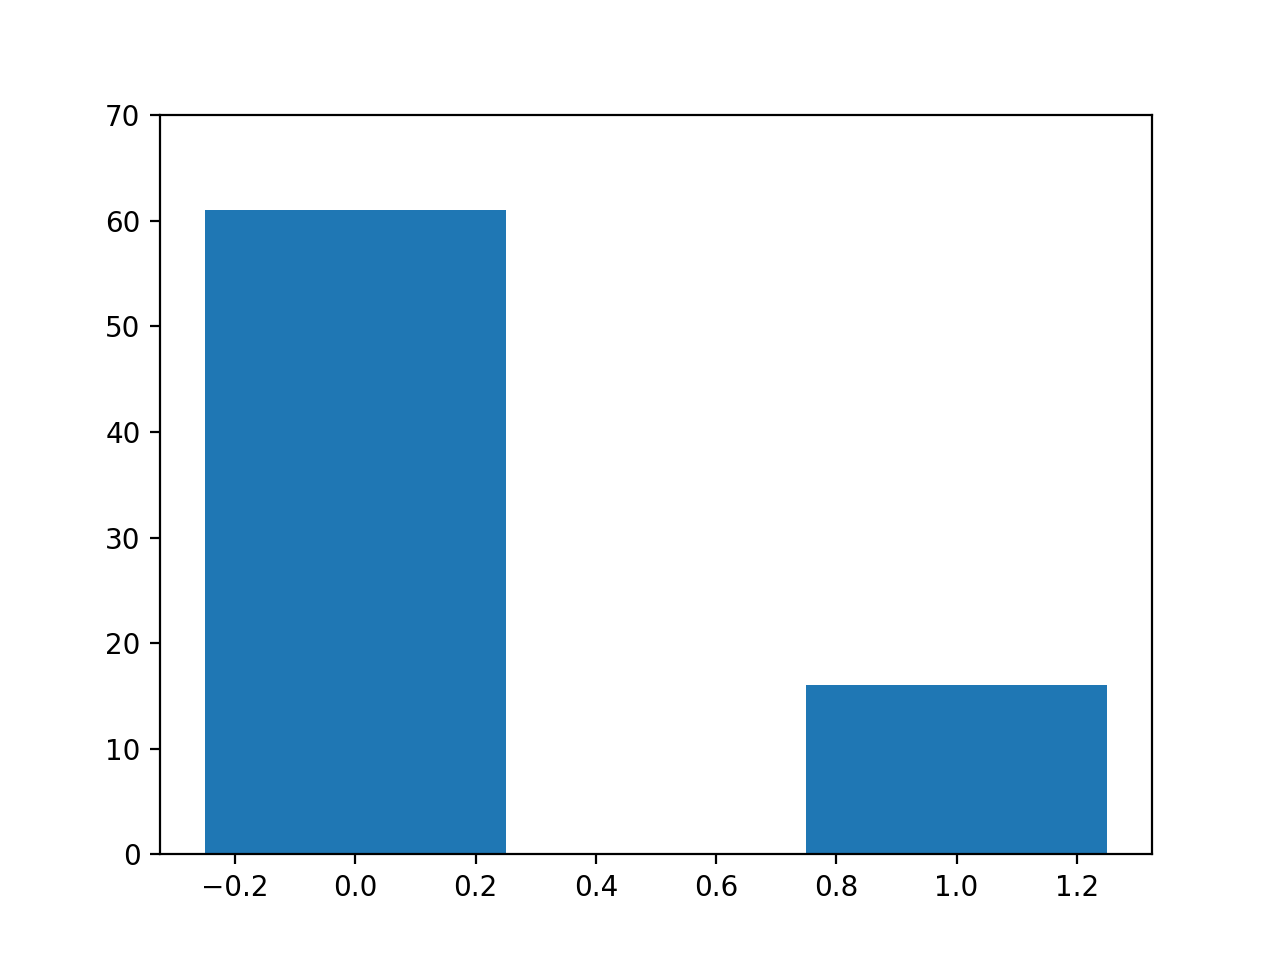

(0, 70)

In [29]:
plt.figure()
plt.bar(x, sig1_cfs, width=0.5)
pylab.ylim([0, 70])

<IPython.core.display.Javascript object>


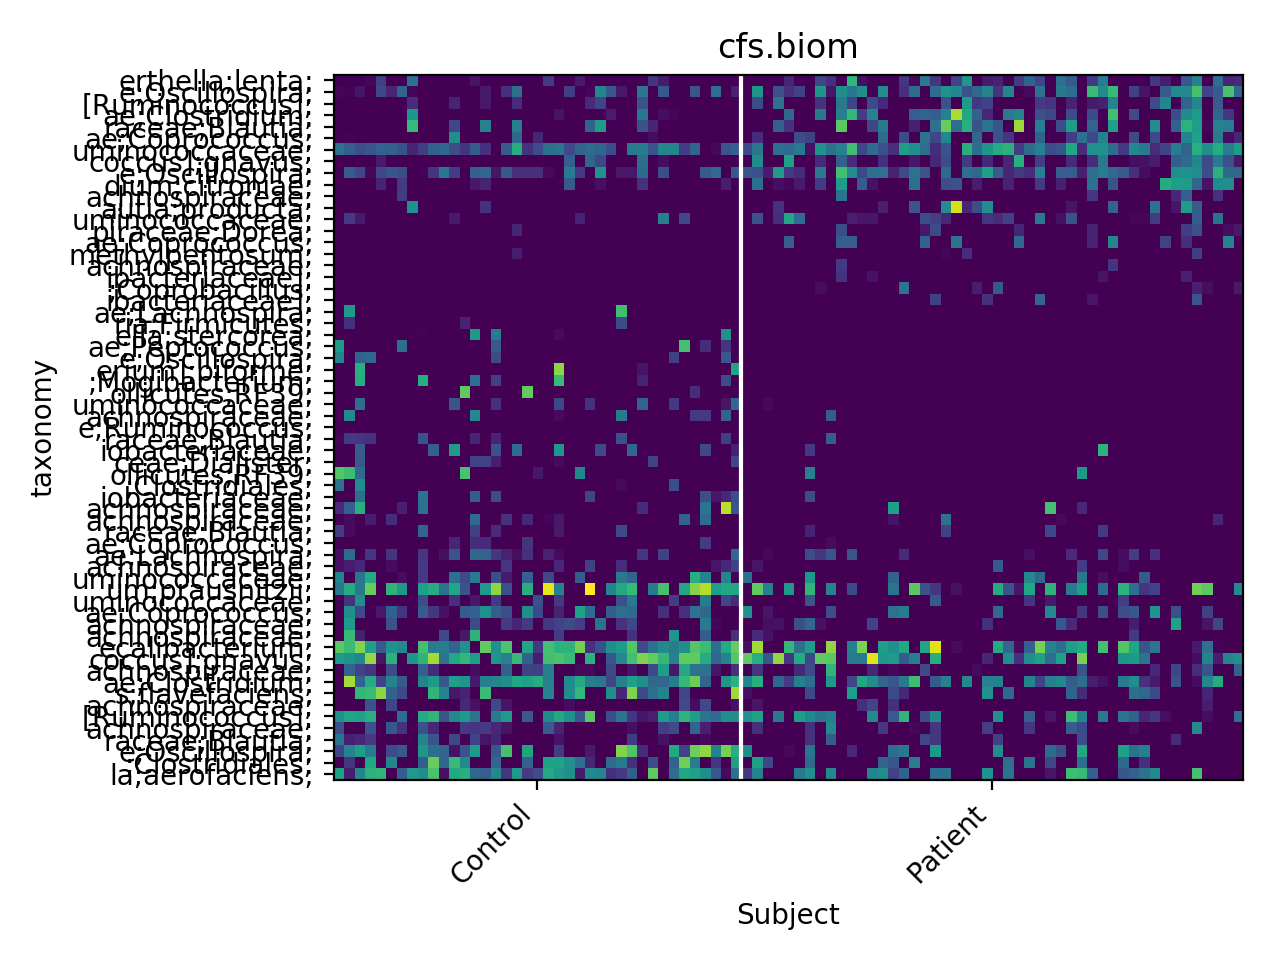

In [30]:
ds1_cfs.plot_sort('Subject', databases=[],gui='jupyter')

<IPython.core.display.Javascript object>


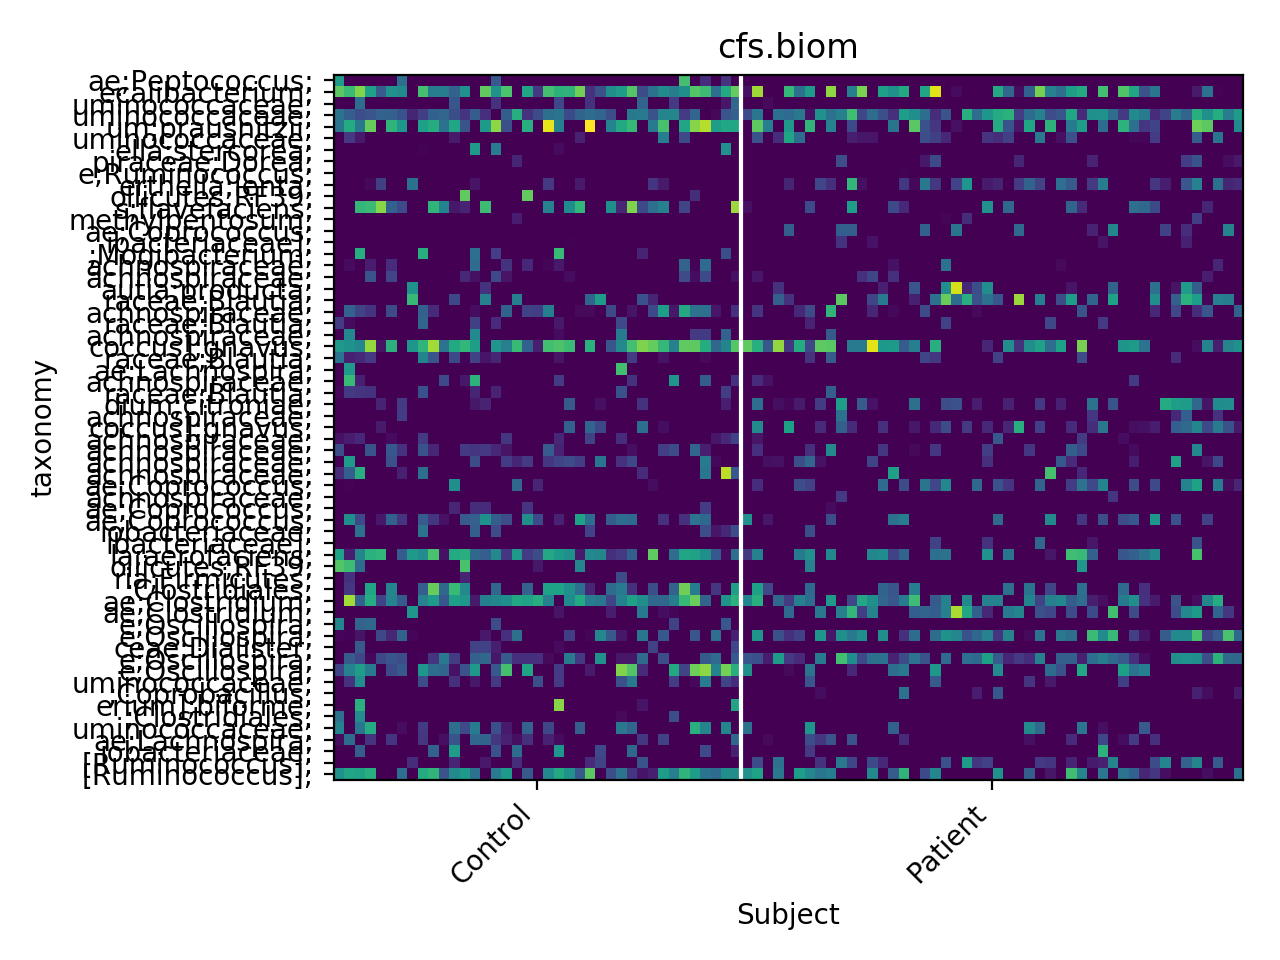

In [31]:
more = ds1_cfs.feature_metadata.index.difference(bh1_gcd.feature_metadata.index)
more = ds1_cfs.filter_ids(more.values)
more.plot_sort('Subject', databases=[], gui='jupyter')

## Soil Human Samples (Qiita ID: 353)

In [33]:
shs = cl.read_taxa('data/shs.biom','data/shs.map.txt', sparse=False, filter_orig_reads=1000)
shs_sub1 = shs.filter_min_abundance(5)

In [34]:
ds1_shs = shs_sub1.diff_abundance('env_feature','ENVO:human-associated habitat','ENVO:soil', fdr_method='dsfdr')
bh1_shs = shs_sub1.diff_abundance('env_feature','ENVO:human-associated habitat','ENVO:soil', fdr_method='bhfdr')
#fbh1_shs = shs_sub1.diff_abundance('env_feature','ENVO:human-associated habitat','ENVO:soil', fdr_method='filterBH')

In [35]:
sig_ds1_shs = len(ds1_shs.feature_metadata.index)
sig_bh1_shs = len(bh1_shs.feature_metadata.index)
#sig_fbh1_shs = len(fbh1_shs.feature_metadata.index)

In [36]:
#x = range(3)
#sig1_shs = np.hstack([sig_ds1_shs, sig_bh1_shs, sig_fbh1_shs])
x = range(2)
sig1_shs = np.hstack([sig_ds1_shs, sig_bh1_shs])

print(sig1_shs)

[2672 2395]


<IPython.core.display.Javascript object>


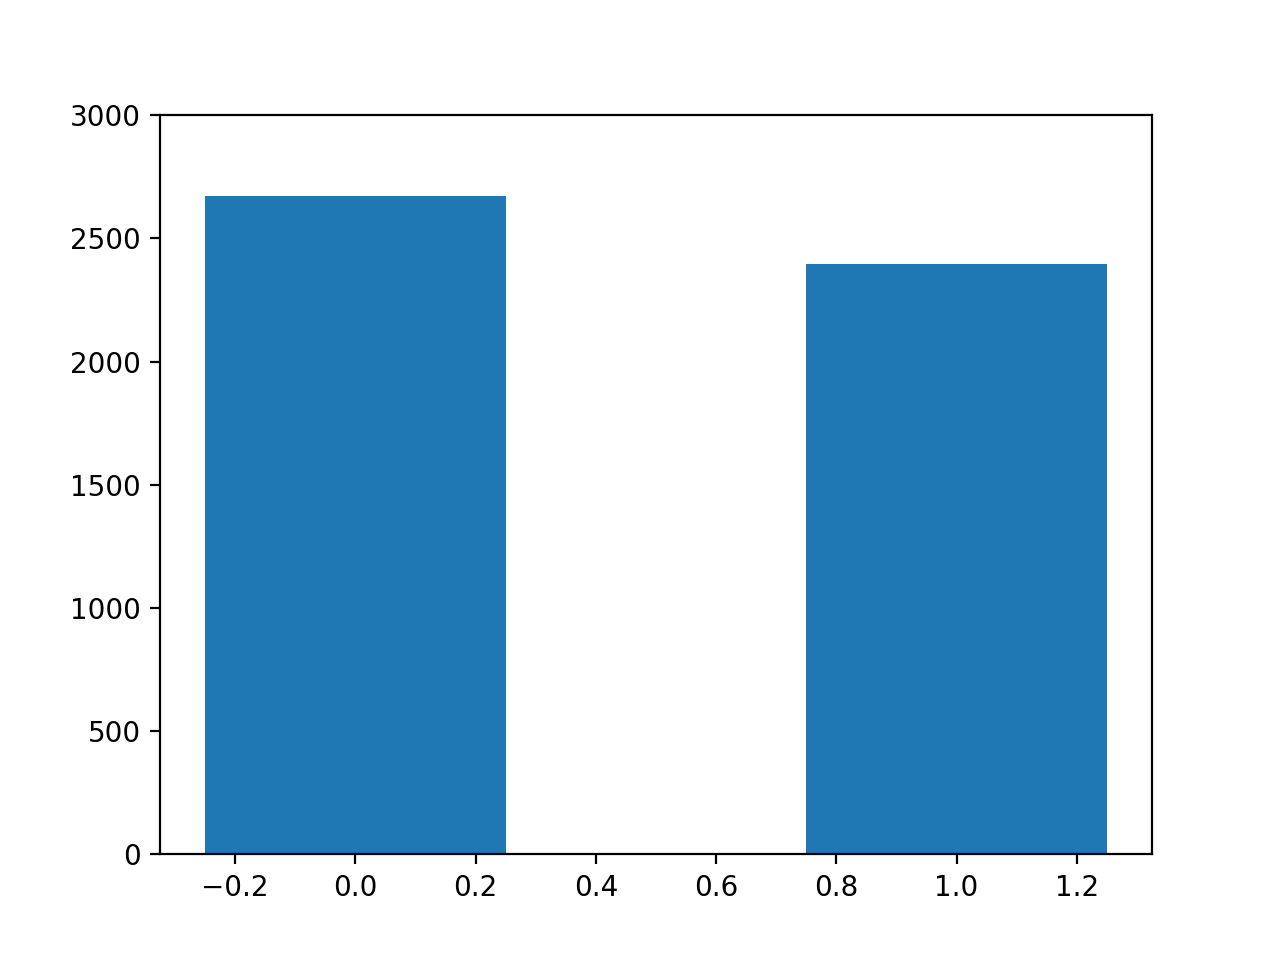

(0, 3000)

In [37]:
plt.figure()
plt.bar(x, sig1_shs, width=0.5)
pylab.ylim([0, 3000])

<IPython.core.display.Javascript object>


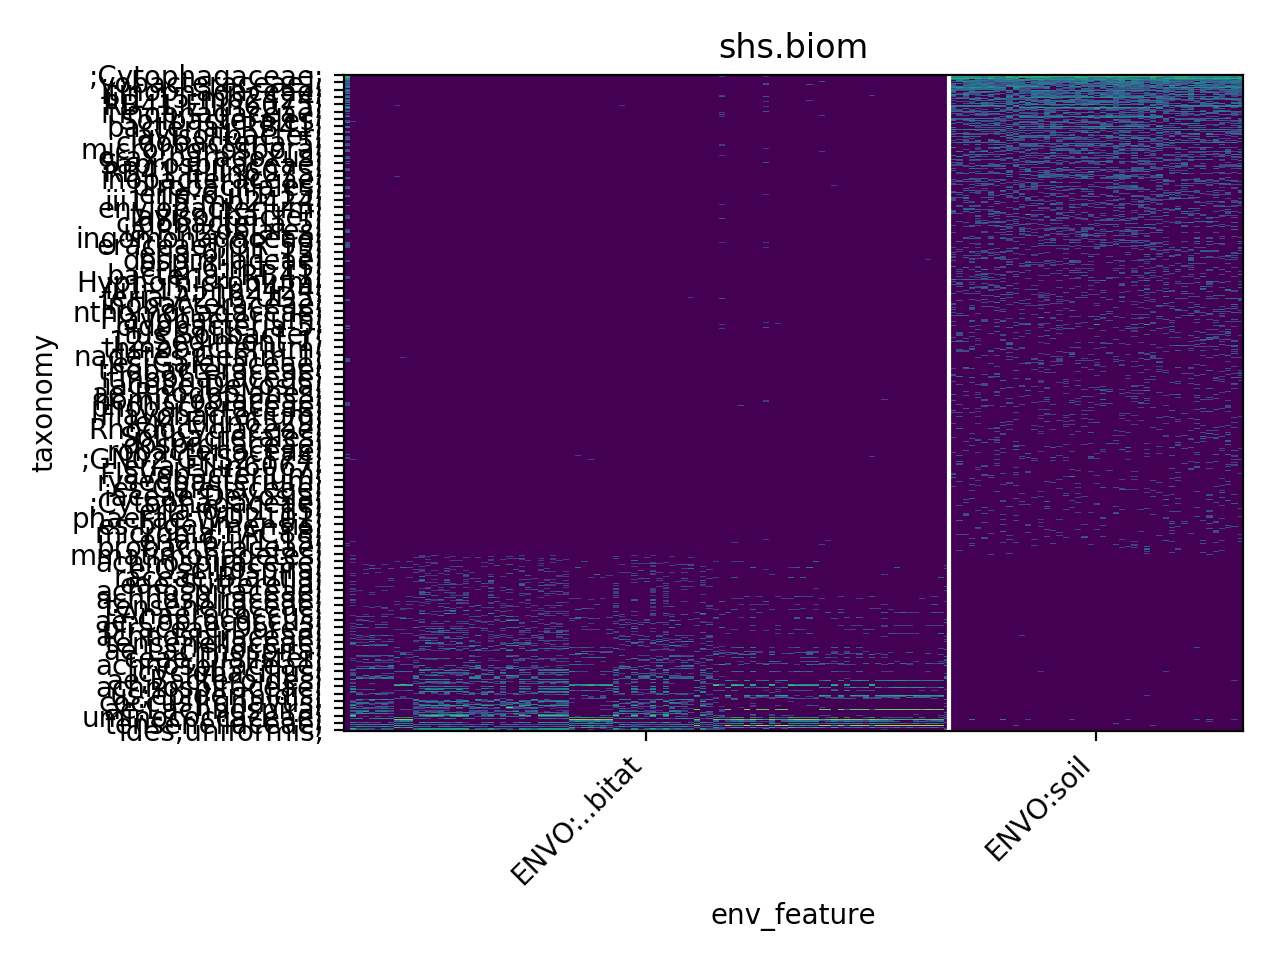

In [38]:
ds1_shs.plot_sort('env_feature', databases=[],gui='jupyter')

<IPython.core.display.Javascript object>


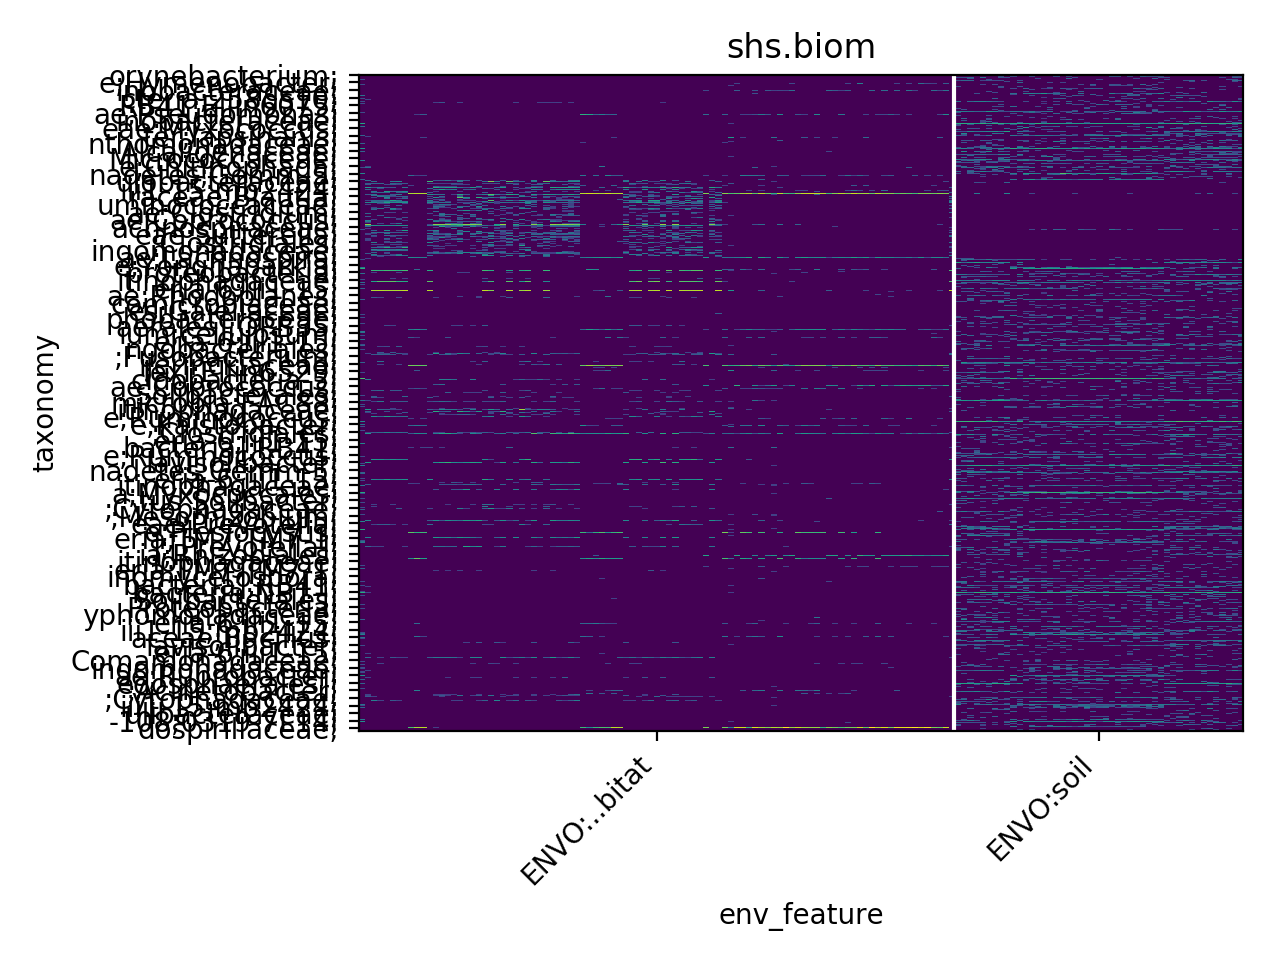

In [39]:
more = ds1_shs.feature_metadata.index.difference(bh1_gcd.feature_metadata.index)
more = ds1_shs.filter_ids(more.values)
more.plot_sort('env_feature', databases=[], gui='jupyter')



## Mice Lacking Toil-like Receptor (Qitta ID: 460)

In [40]:
mlt = cl.read_taxa('data/mlt.biom','data/mlt.map.txt', sparse=False, filter_orig_reads=1000)
mlt_sub1 = mlt.filter_min_abundance(5)

In [41]:
ds1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='dsfdr')
bh1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='bhfdr')
#fbh1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='filterBH')

2017-03-13 14:11:24 WARNING no significant features found


In [42]:
sig_ds1_mlt = len(ds1_mlt.feature_metadata.index)
sig_bh1_mlt = 0
#sig_fbh1_mlt = 0

In [43]:
#x = range(3)
#sig1_mlt = np.hstack([sig_ds1_mlt, sig_bh1_mlt, sig_fbh1_mlt])
x = range(2)
sig1_mlt = np.hstack([sig_ds1_mlt, sig_bh1_mlt])
print(sig1_mlt)

[41  0]


<IPython.core.display.Javascript object>


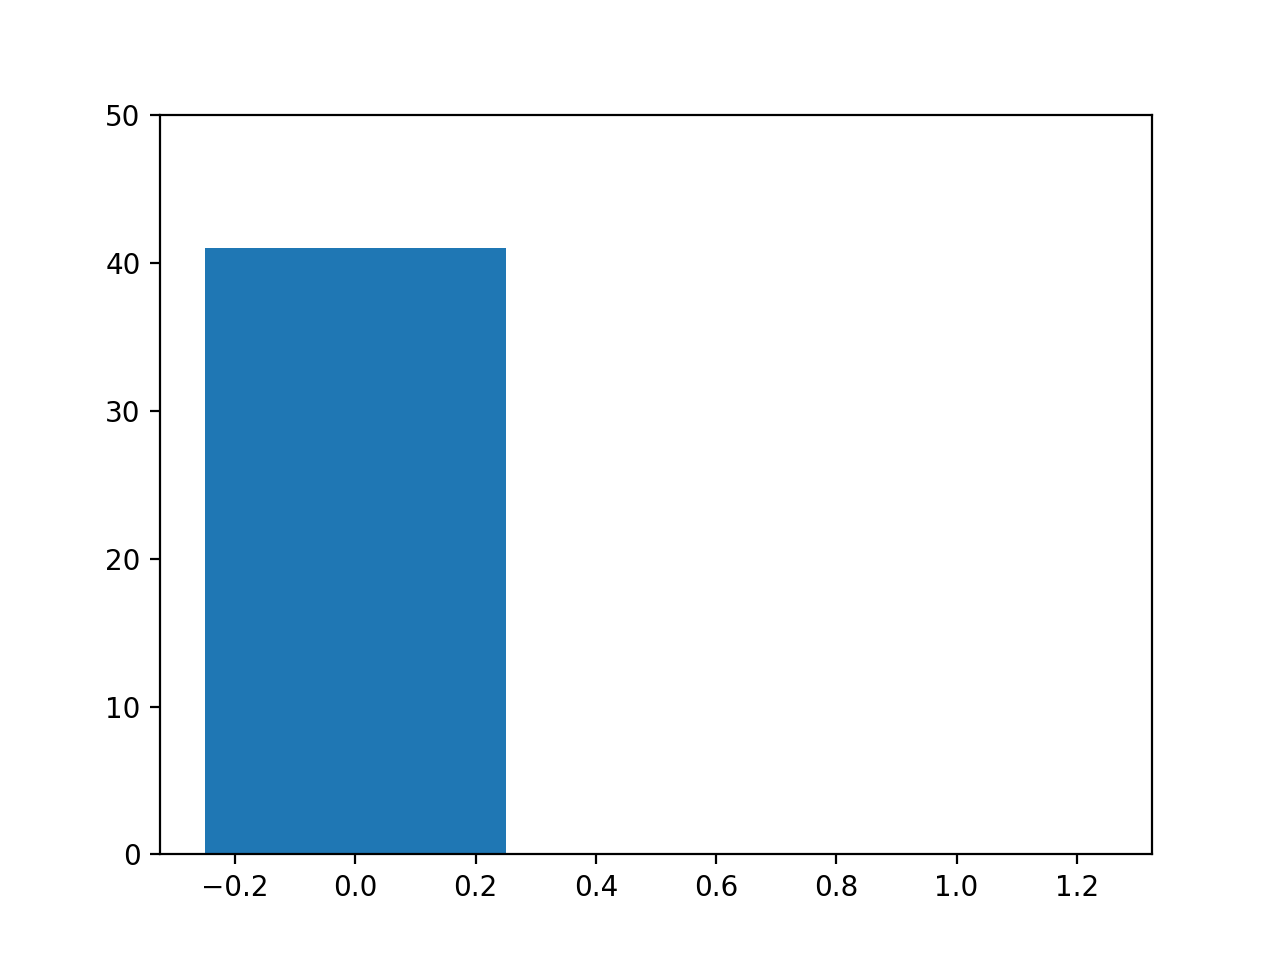

(0, 50)

In [44]:
plt.figure()
plt.bar(x, sig1_mlt, width=0.5)
pylab.ylim([0, 50])

<IPython.core.display.Javascript object>


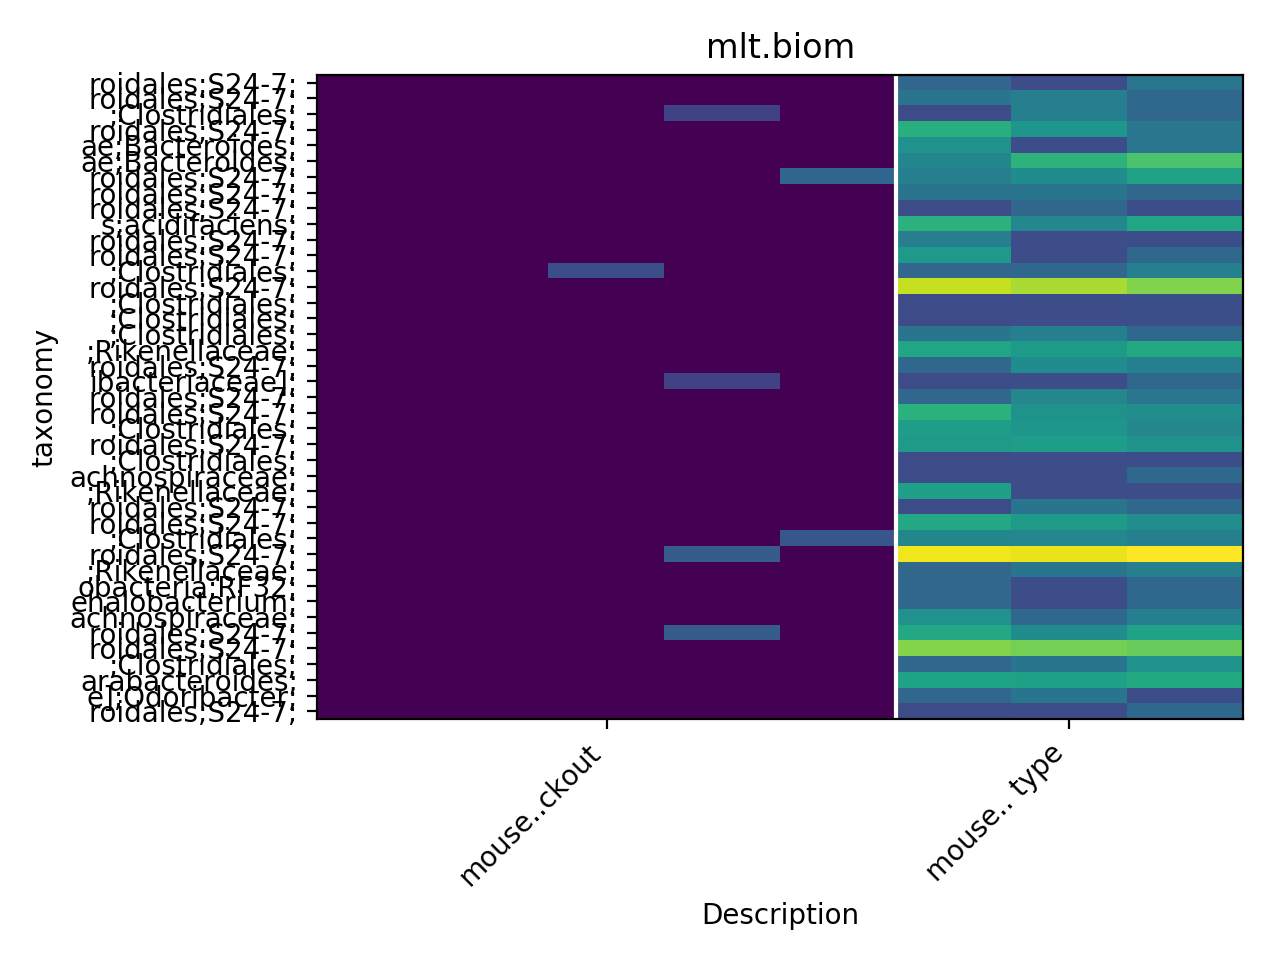

In [45]:
ds1_mlt.plot_sort('Description', databases=[],gui='jupyter') # reference: table 1 in original paper supplemental

## Cigarette Smokers (Qiita: 524)

In [ ]:
## anything wrong here (last time: sig_CS = c(181, 121, 0))

In [128]:
cs = cl.read_taxa('data/cs.biom','data/cs.map.txt', sparse=False, filter_orig_reads=1000)
cs_sub1 = cs.filter_min_abundance(5)

In [132]:
cs_sub1

AmpliconExperiment cs.biom with 235 samples, 2341 features

In [129]:
ds1_cs = cs_sub1.diff_abundance('smoker','False','True', fdr_method='dsfdr')
bh1_cs = cs_sub1.diff_abundance('smoker','False','True', fdr_method='bhfdr')
#fbh1_cs = cs_sub1.diff_abundance('smoker','False','True', fdr_method='filterBH')

In [48]:
sig_ds1_cs = len(ds1_cs.feature_metadata.index)
sig_bh1_cs = len(bh1_cs.feature_metadata.index)
#sig_fbh1_cs = len(fbh1_cs.feature_metadata.index)

In [49]:
#x = range(3)
#sig1_cs = np.hstack([sig_ds1_cs, sig_bh1_cs, sig_fbh1_cs])
sig1_cs = np.hstack([sig_ds1_cs, sig_bh1_cs])
print(sig1_cs)

[2341 2341]


<IPython.core.display.Javascript object>


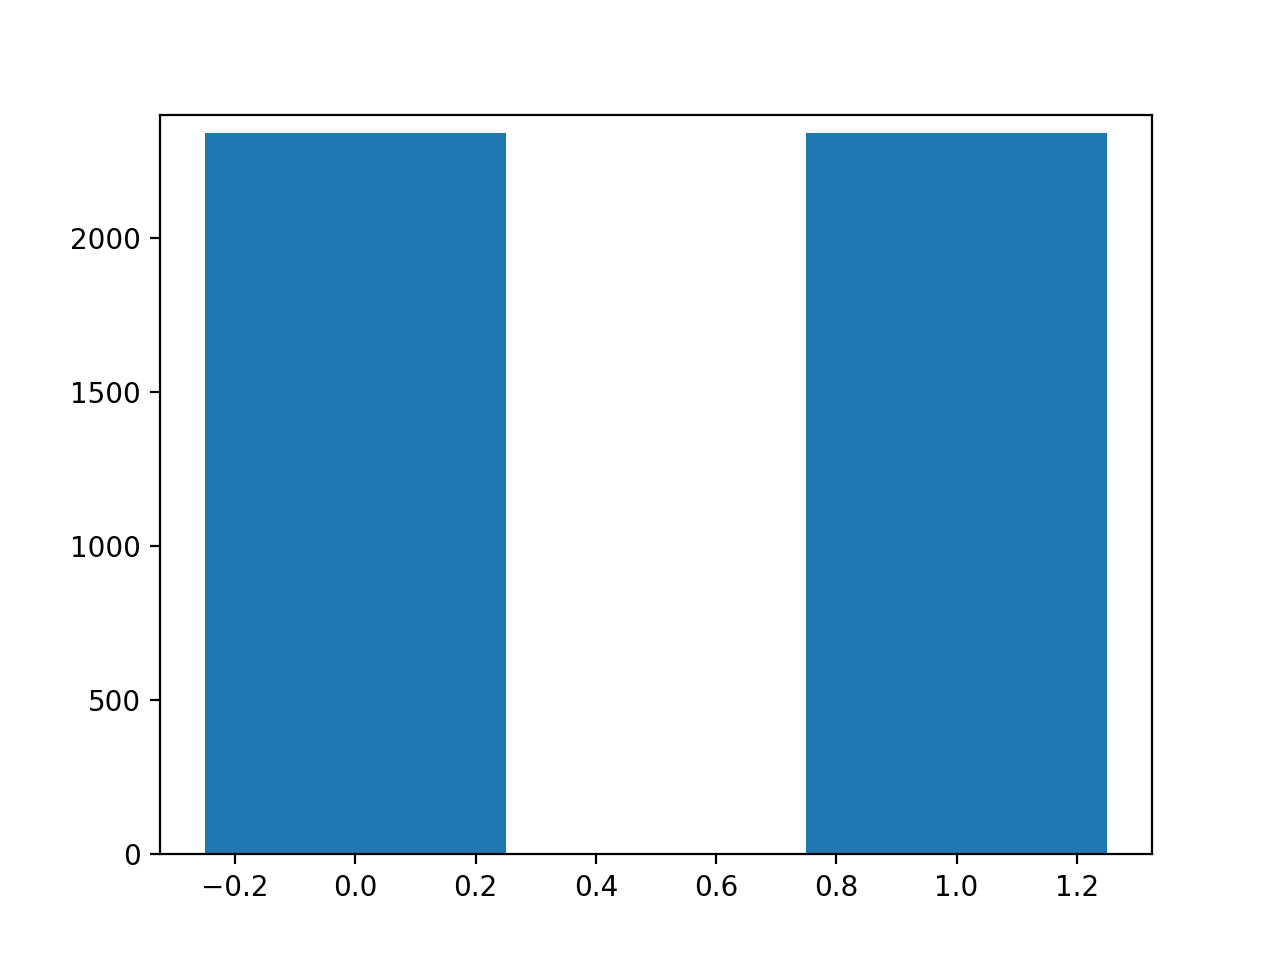

(0, 2400)

In [50]:
plt.figure()
plt.bar(x, sig1_cs, width=0.5)
pylab.ylim([0, 2400])

<IPython.core.display.Javascript object>


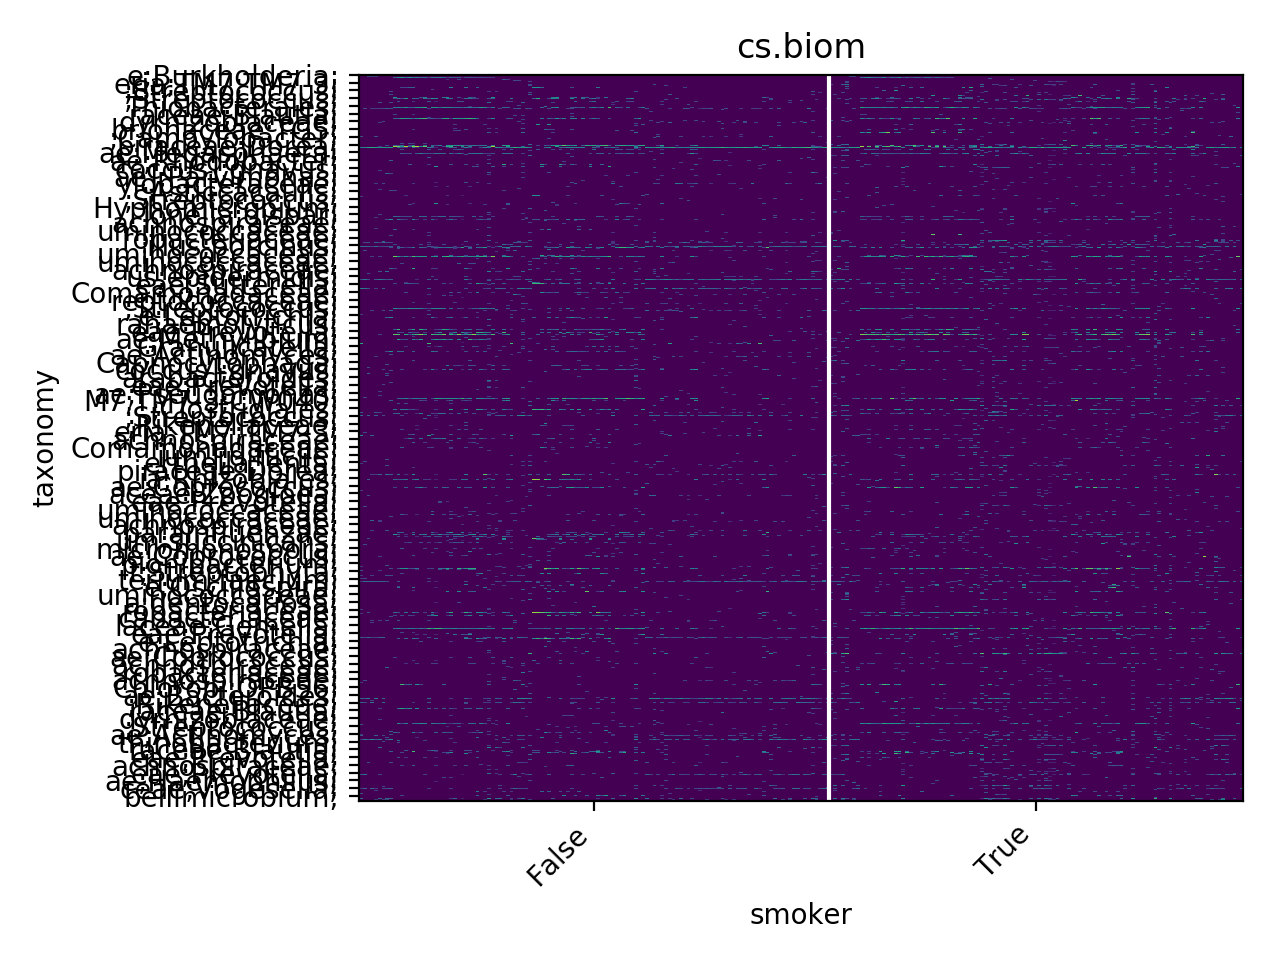

In [51]:
ds1_cs.plot_sort('smoker', databases=[],gui='jupyter')

In [ ]:
more = ds1_cs.feature_metadata.index.difference(bh1_gcd.feature_metadata.index)
more = ds1_cs.filter_ids(more.values)
more.plot_sort('smoker', databases=[], gui='jupyter')

<IPython.core.display.Javascript object>


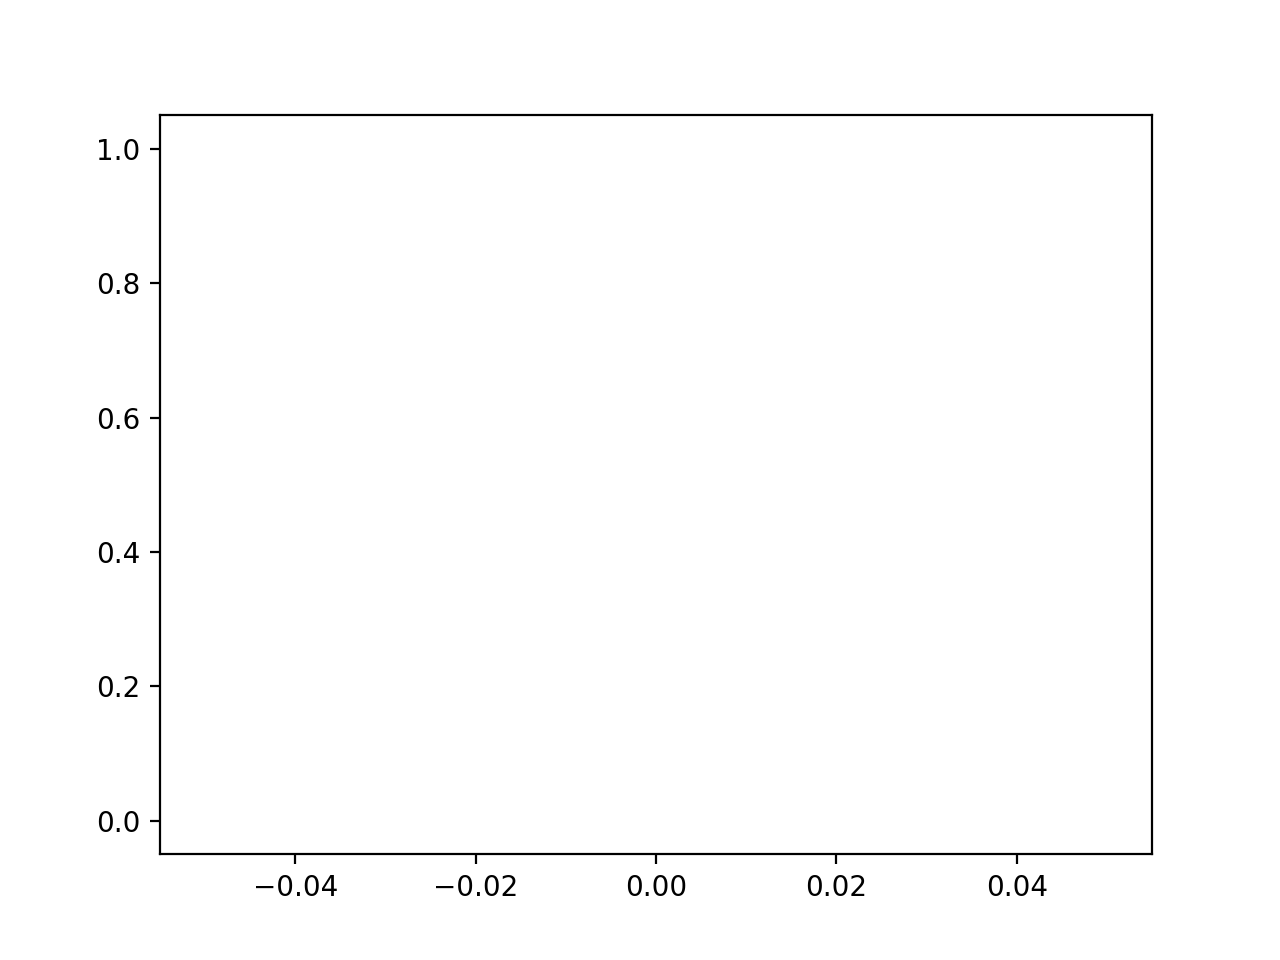

In [52]:
# test on CS (plot p-values)
from statsmodels.distributions.empirical_distribution import ECDF

a = cs_sub1.diff_abundance('smoker','False','True',alpha=1, fdr_method='dsfdr')
b = a.feature_metadata['_calour_diff_abundance_pval']

sample = b 
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

In [32]:
np.sum(b)

0.0

## Delivery Mode Effect (Qiita: 395)

In [54]:
dme = cl.read_taxa('data/dme.biom','data/dme.map.txt', sparse=False, filter_orig_reads=1000)
dme_sub1 = dme.filter_min_abundance(5)

In [55]:
ds1_dme = dme_sub1.diff_abundance('misc_param','cesarean delivery','vaginal delivery', fdr_method='dsfdr')
bh1_dme = dme_sub1.diff_abundance('misc_param','cesarean delivery','vaginal delivery', fdr_method='bhfdr')
#fbh1_dme = dme_sub1.diff_abundance('misc_param','cesarean delivery','vaginal delivery', fdr_method='filterBH')

In [56]:
sig_ds1_dme = len(ds1_dme.feature_metadata.index)
sig_bh1_dme = len(bh1_dme.feature_metadata.index)
#sig_fbh1_dme = len(fbh1_dme.feature_metadata.index)

In [57]:
#x = range(3)
#sig1_dme = np.hstack([sig_ds1_dme, sig_bh1_dme, sig_fbh1_dme])
x = range(2)
sig1_dme = np.hstack([sig_ds1_dme, sig_bh1_dme])
print(sig1_dme)

[403 148]


<IPython.core.display.Javascript object>


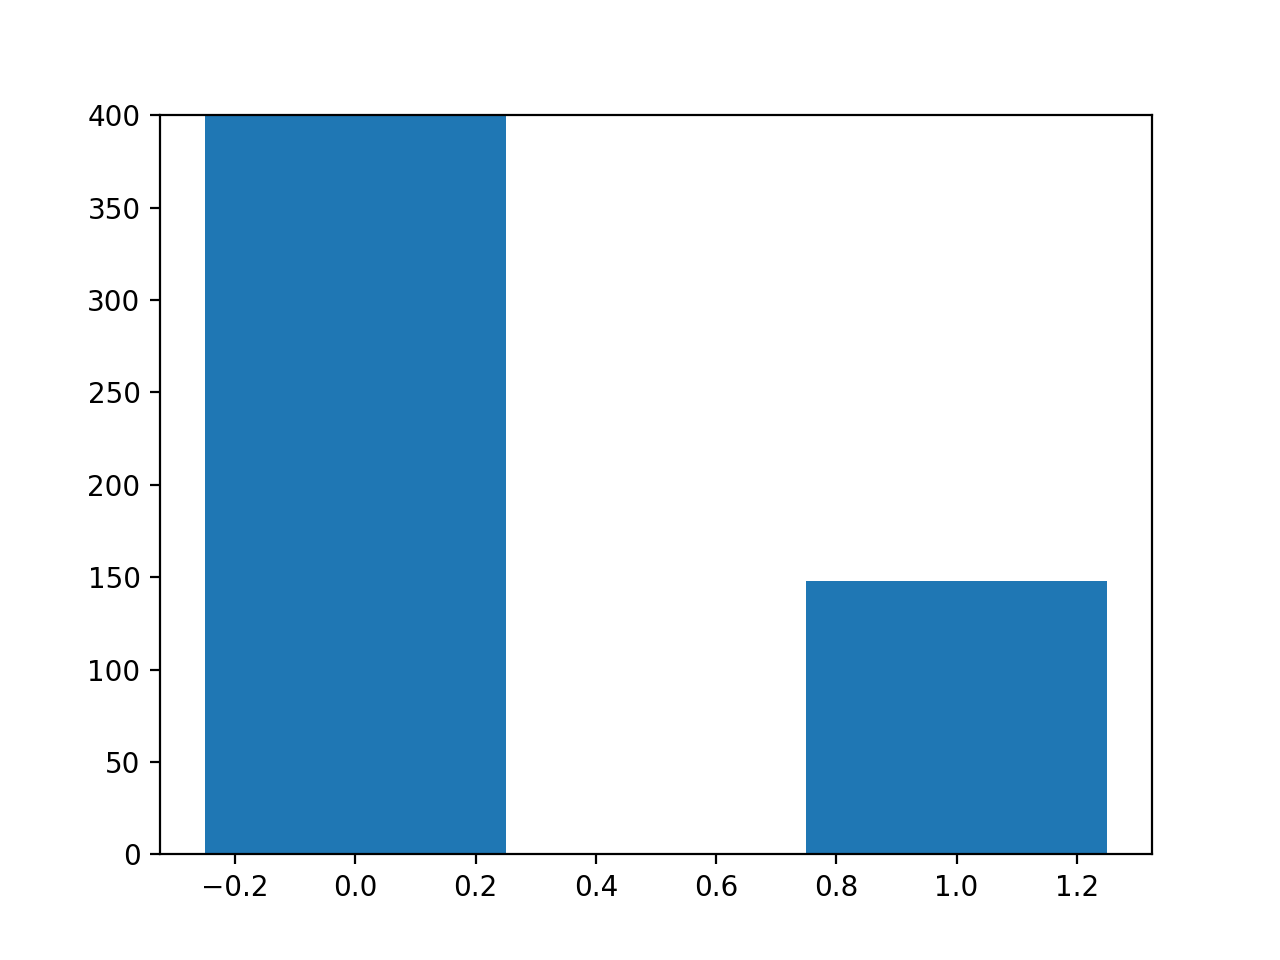

(0, 400)

In [58]:
plt.figure()
plt.bar(x, sig1_dme, width=0.5)
pylab.ylim([0, 400])

<IPython.core.display.Javascript object>


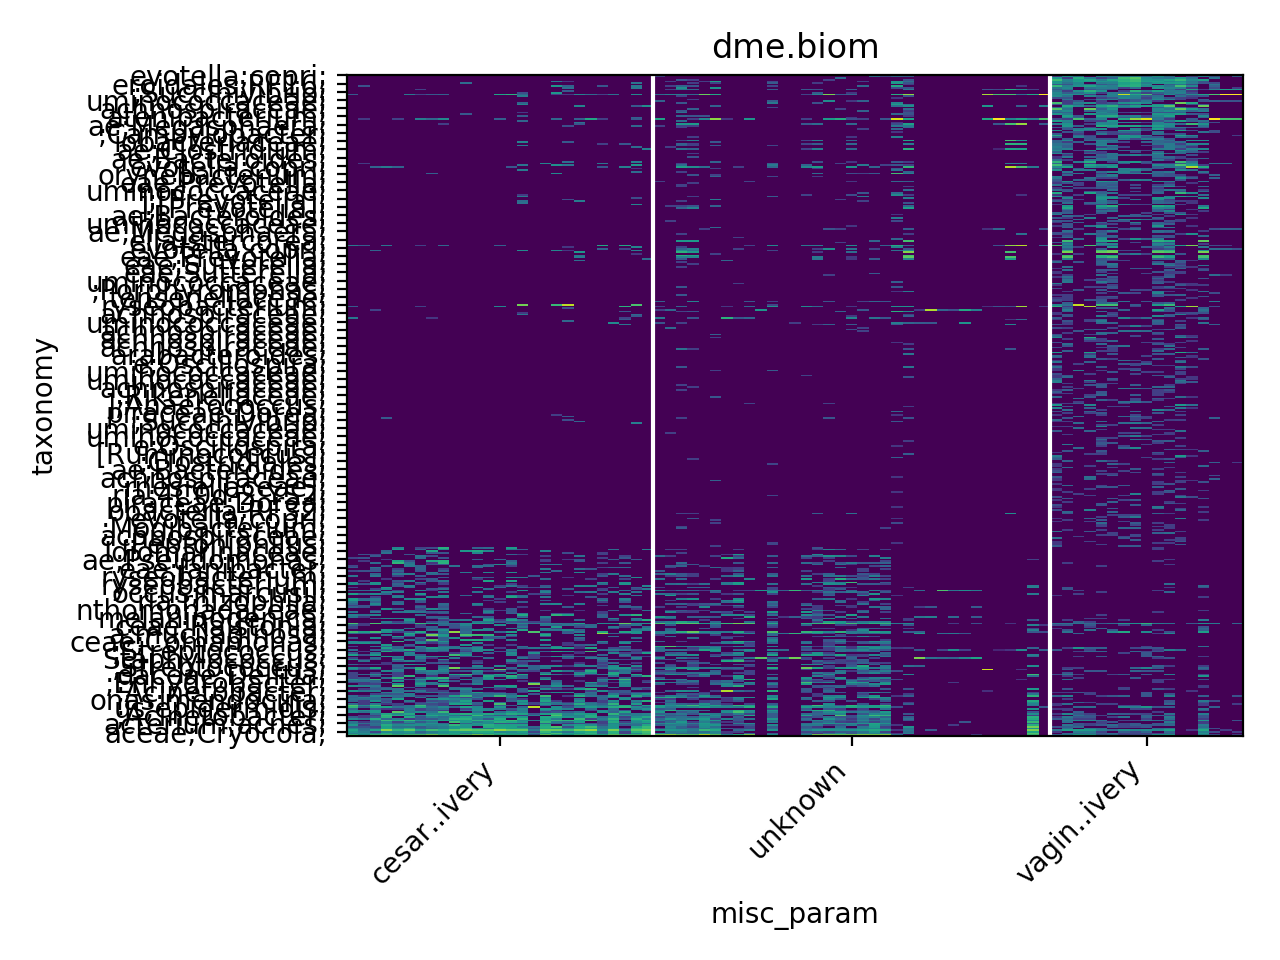

In [59]:
ds1_dme.plot_sort('misc_param', databases=[],gui='jupyter')

<IPython.core.display.Javascript object>


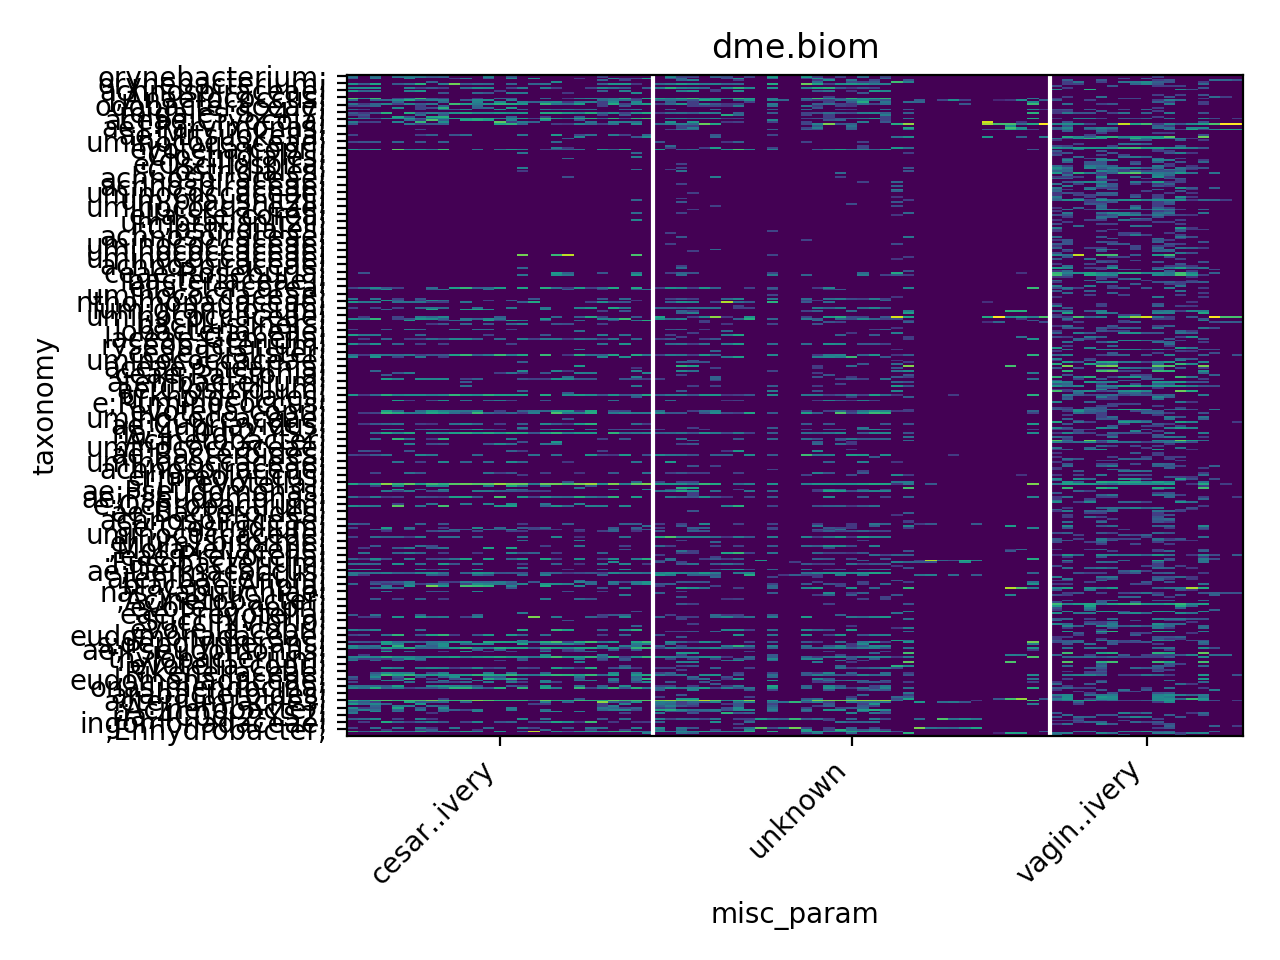

In [60]:
more = ds1_dme.feature_metadata.index.difference(bh1_gcd.feature_metadata.index)
more = ds1_dme.filter_ids(more.values)
more.plot_sort('misc_param', databases=[], gui='jupyter')

## UK Twins

In [61]:
ukt = cl.read_taxa('data/uk_twins_otu.biom','data/uk_twins_map.txt',sparse=False, filter_orig_reads=1000)
ukt_sub1 = ukt.filter_min_abundance(5)

In [62]:
ds1_ukt = ukt_sub1.diff_abundance('bmi_cat','Lean','Obese',fdr_method='dsfdr')
bh1_ukt = ukt_sub1.diff_abundance('bmi_cat','Lean','Obese',fdr_method='bhfdr')
#fbh1_ukt = ukt_sub1.diff_abundance('bmi_cat','Lean','Obese',fdr_method='filterBH')

In [63]:
sig_ds1_ukt = len(ds1_ukt.feature_metadata.index)
sig_bh1_ukt = len(bh1_ukt.feature_metadata.index)
#sig_fbh1_ukt = len(fbh1_ukt.feature_metadata.index)

In [64]:
#x = range(3)
#sig1_ukt = np.hstack([sig_ds1_ukt, sig_bh1_ukt, sig_fbh1_ukt])
x = range(2)
sig1_ukt = np.hstack([sig_ds1_ukt, sig_bh1_ukt])
print(sig1_ukt)

[385 338]


<IPython.core.display.Javascript object>


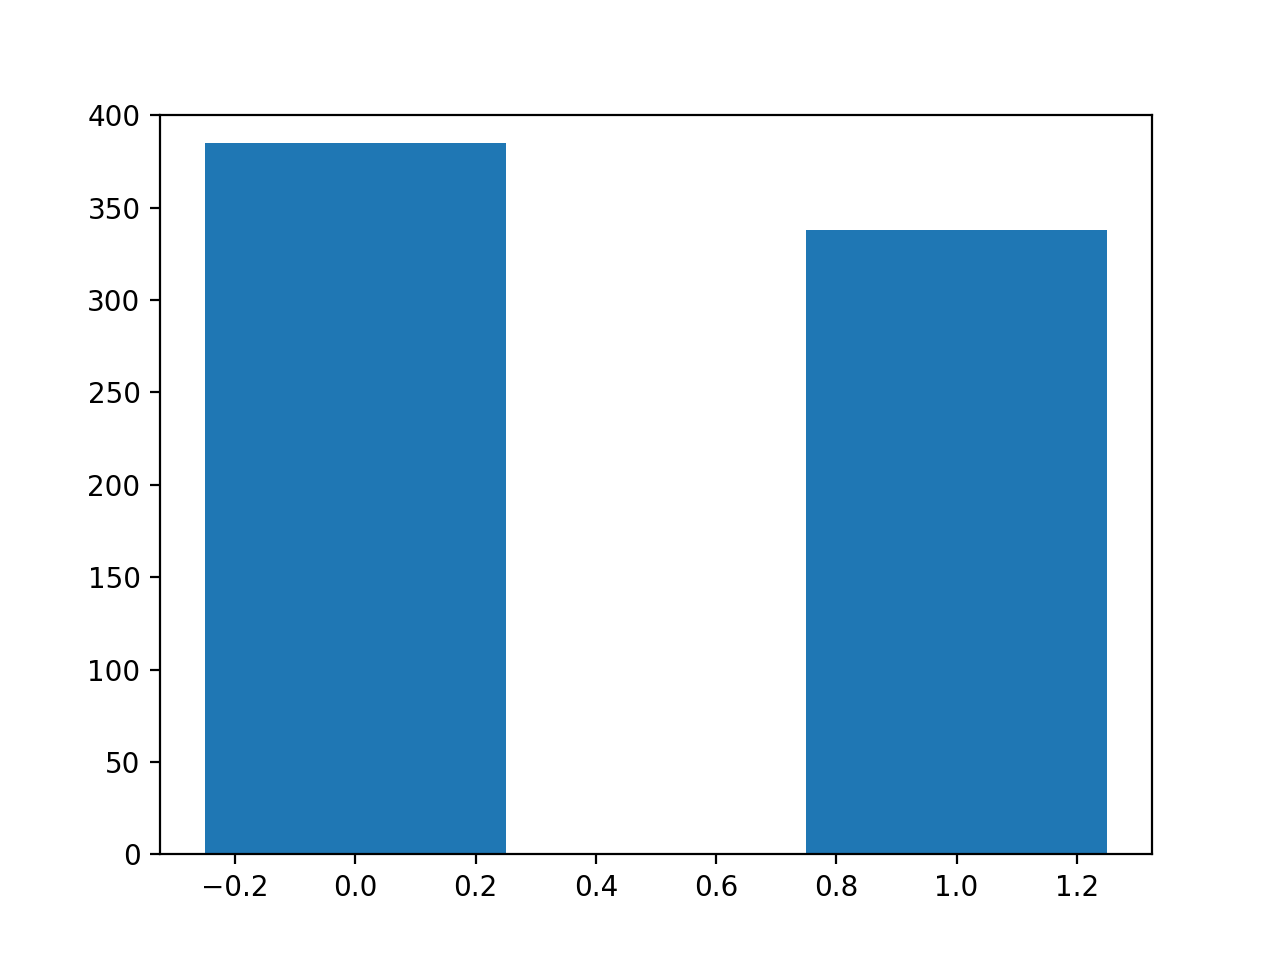

(0, 400)

In [65]:
plt.figure()
plt.bar(x, sig1_ukt, width=0.5)
pylab.ylim([0, 400])

In [67]:
# ds1_ukt.plot_sort('bmi_cat', databases=[],gui='jupyter')
# gives error message

In [19]:
#more_ukt = ds1_ukt.feature_metadata.index.difference(bh1_ukt.feature_metadata.index)
#more_ukt = ds1_ukt.filter_ids(more_ukt.values)
#more_ukt.plot_sort('bmi_cat', databases=[], gui='jupyter')
# gives error message

## American Gut

In [187]:
mapping = pd.read_csv('data/ag.map.txt', sep='\t', dtype=str)

In [188]:
fecals = mapping[mapping.BODY_PRODUCT == 'UBERON:feces']
fecals = fecals[fecals.HOST_TAXID == '9606']

In [189]:
fecals.to_csv('ag_fecals.map.txt', sep='\t', index = False)

In [192]:
ag = cl.read_taxa('data/ag.biom','data/ag_fecals.map.txt',sparse=False, filter_orig_reads=1000)
ag_sub1 = ag.filter_min_abundance(5)

## similar results

In [89]:
ds1_ag = ag_sub1.diff_abundance('SEX','female','male',fdr_method='dsfdr')
bh1_ag = ag_sub1.diff_abundance('SEX','female','male',fdr_method='bhfdr')


In [121]:
sig_ds1_ag = len(ds1_ukt.feature_metadata.index)
sig_bh1_ag = len(bh1_ukt.feature_metadata.index)
print(sig_ds1_ag, sig_bh1_ag)

385 338


In [95]:
# ds1_ag.plot_sort('SEX', databases=[],gui='jupyter') error message

## no significant findings

In [97]:
ds2_ag = ag_sub1.diff_abundance('BMI_CAT','Normal','Overweight',fdr_method='dsfdr')
bh2_ag = ag_sub1.diff_abundance('BMI_CAT','Normal','Overweight',fdr_method='bhfdr')

2017-03-13 15:12:41 WARNING no significant features found
2017-03-13 15:13:30 WARNING no significant features found


In [117]:
ds6_ag = ag_sub1.diff_abundance('DIET_TYPE','Vegetarian','Omnivore',fdr_method='dsfdr')
bh6_ag = ag_sub1.diff_abundance('DIET_TYPE','Vegetarian','Omnivore',fdr_method='bhfdr')

2017-03-13 15:49:13 WARNING no significant features found
2017-03-13 15:50:05 WARNING no significant features found


In [122]:
ds3_ag = ag_sub1.diff_abundance('VEGETABLE_FREQUENCY','Daily','Regularly',fdr_method='dsfdr')
bh3_ag = ag_sub1.diff_abundance('VEGETABLE_FREQUENCY','Daily','Regularly',fdr_method='bhfdr')

In [123]:
sig_ds3_ag = len(ds3_ag.feature_metadata.index)
sig_bh3_ag = len(bh3_ag.feature_metadata.index)
print(sig_ds3_ag)
print(sig_bh3_ag)

36064
36064


In [120]:
ds7_ag = ag_sub1.diff_abundance('BOWEL_MOVEMENT_QUALITY','I tend to have normal formed stool',
                                'I tend to have diarrhea (watery stool)',fdr_method='dsfdr')
bh7_ag = ag_sub1.diff_abundance('BOWEL_MOVEMENT_QUALITY','I tend to have normal formed stool',
                                'I tend to have diarrhea (watery stool)',fdr_method='bhfdr')

2017-03-13 15:51:27 WARNING no significant features found
2017-03-13 15:51:50 WARNING no significant features found


## interesting findings!

In [148]:
ds4_ag = ag_sub1.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week',fdr_method='dsfdr')
bh4_ag = ag_sub1.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                'Week',fdr_method='bhfdr')

In [154]:
sig_ds4_ag = len(ds4_ag.feature_metadata.index)
sig_bh4_ag = 0 # len(bh4_ag.feature_metadata.index)
print(sig_ds4_ag)
print(sig_bh4_ag)

317
0


In [155]:
ds4_ag.sample_metadata['ANTIBIOTIC_HISTORY']=ds4_ag.sample_metadata['ANTIBIOTIC_HISTORY'].astype(str)

<IPython.core.display.Javascript object>


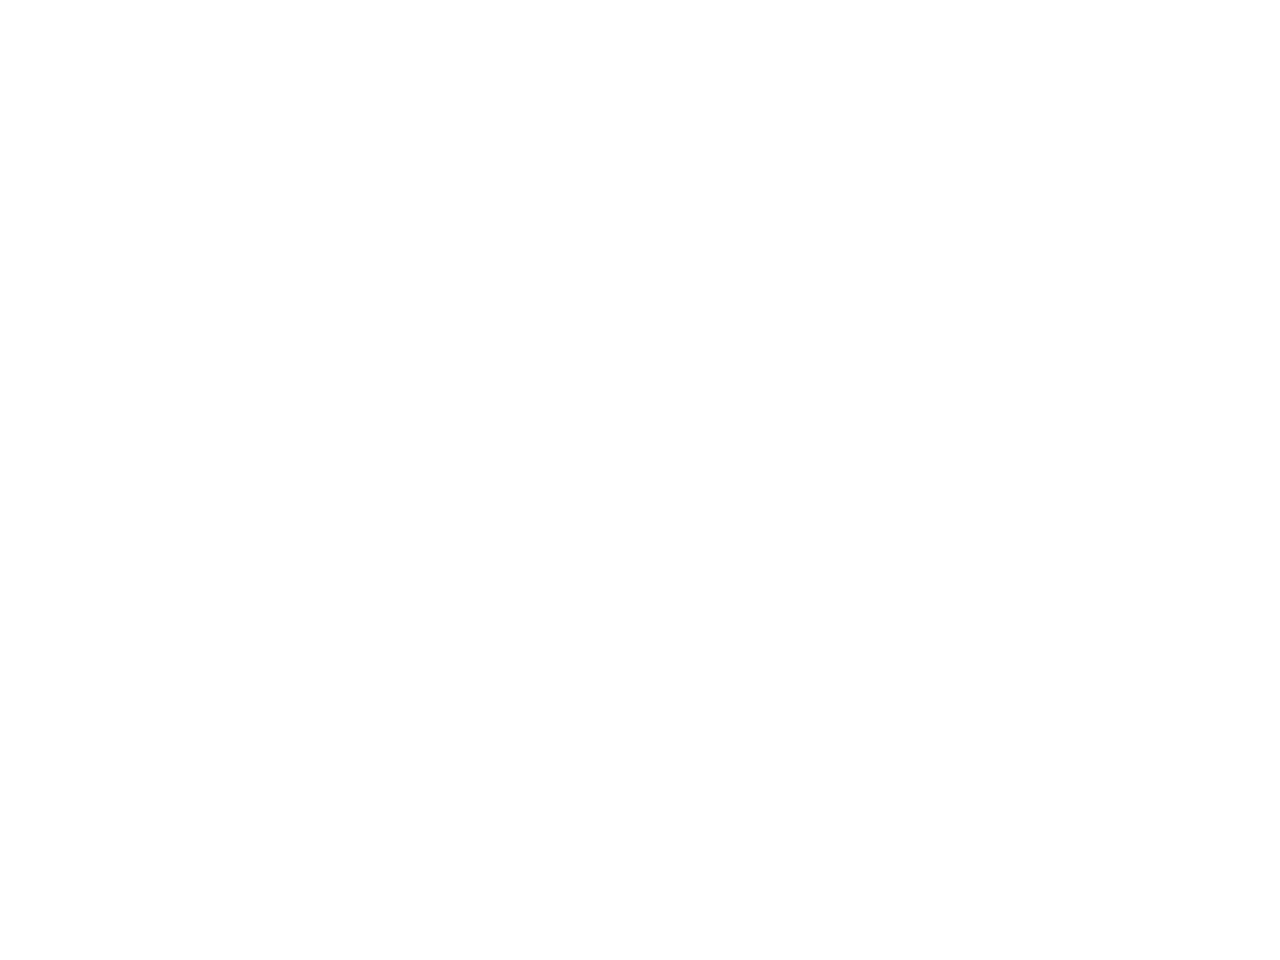

found 54
found 1


In [156]:
ds4_ag.plot_sort('ANTIBIOTIC_HISTORY', gui='qt5')

In [167]:
ds4_ag2 = ds4_ag.filter_samples('ANTIBIOTIC_HISTORY',['I have not taken antibiotics in the past year.',
                                'Week'])

In [169]:
ds4_ag2.sample_metadata.ANTIBIOTIC_HISTORY.value_counts()

I have not taken antibiotics in the past year.    5056
Week                                               169
Name: ANTIBIOTIC_HISTORY, dtype: int64

<IPython.core.display.Javascript object>


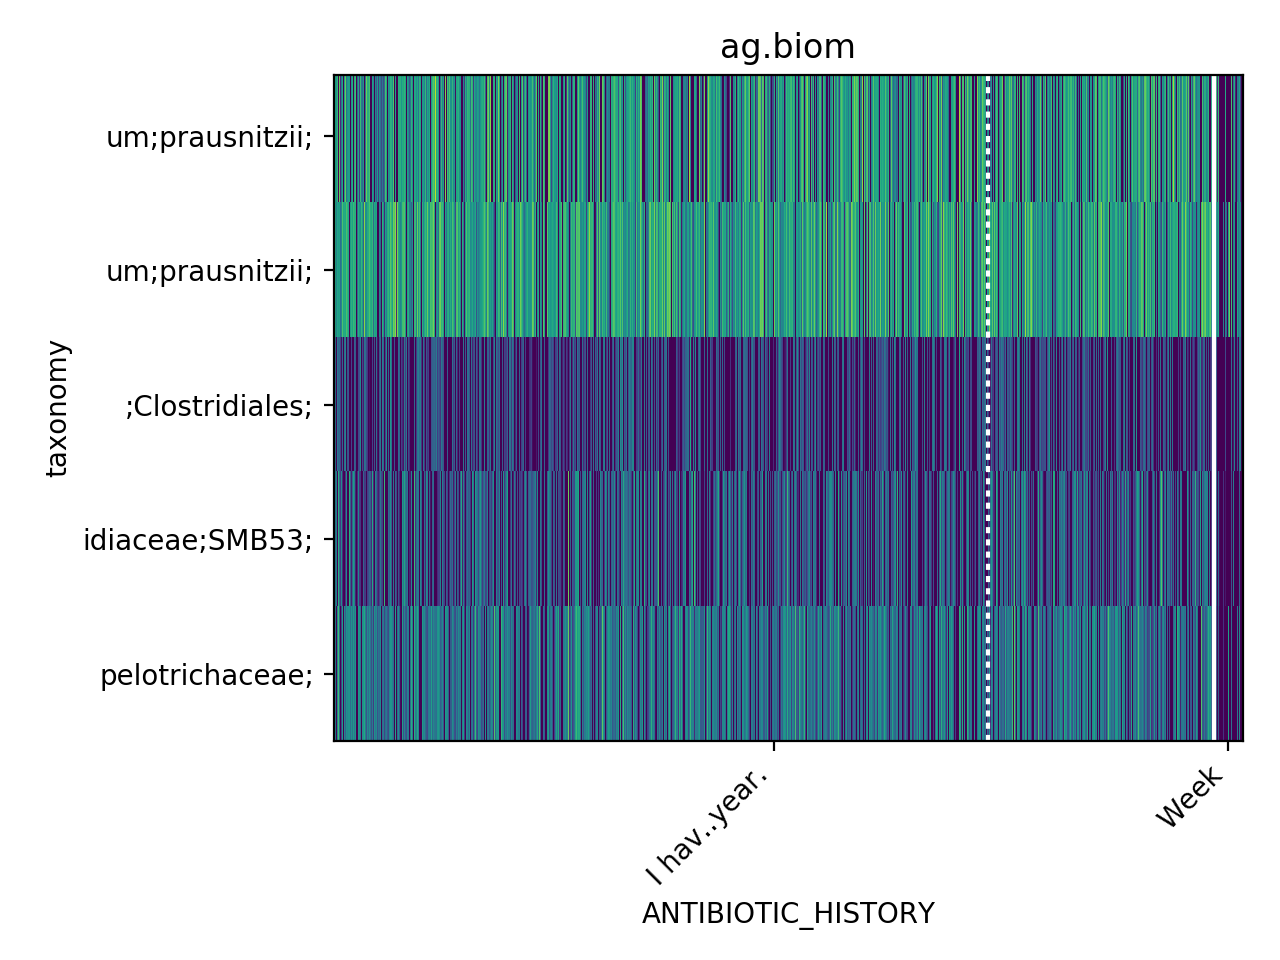

In [168]:
ds4_ag2.plot_sort('ANTIBIOTIC_HISTORY', databases=[],gui='jupyter') 

In [ ]:
## types of plants

In [108]:
ds5_ag = ag_sub1.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5',fdr_method='dsfdr')
bh5_ag = ag_sub1.diff_abundance('TYPES_OF_PLANTS','More than 30','Less than 5',fdr_method='bhfdr')

2017-03-13 15:25:16 WARNING no significant features found


In [110]:
sig_ds5_ag = len(ds5_ag.feature_metadata.index)
sig_bh5_ag = 0
print(sig_ds5_ag)
print(sig_bh5_ag)

412
0


In [139]:
ds5_ag.sample_metadata['TYPES_OF_PLANTS']=ds5_ag.sample_metadata['TYPES_OF_PLANTS'].astype(str)

<IPython.core.display.Javascript object>


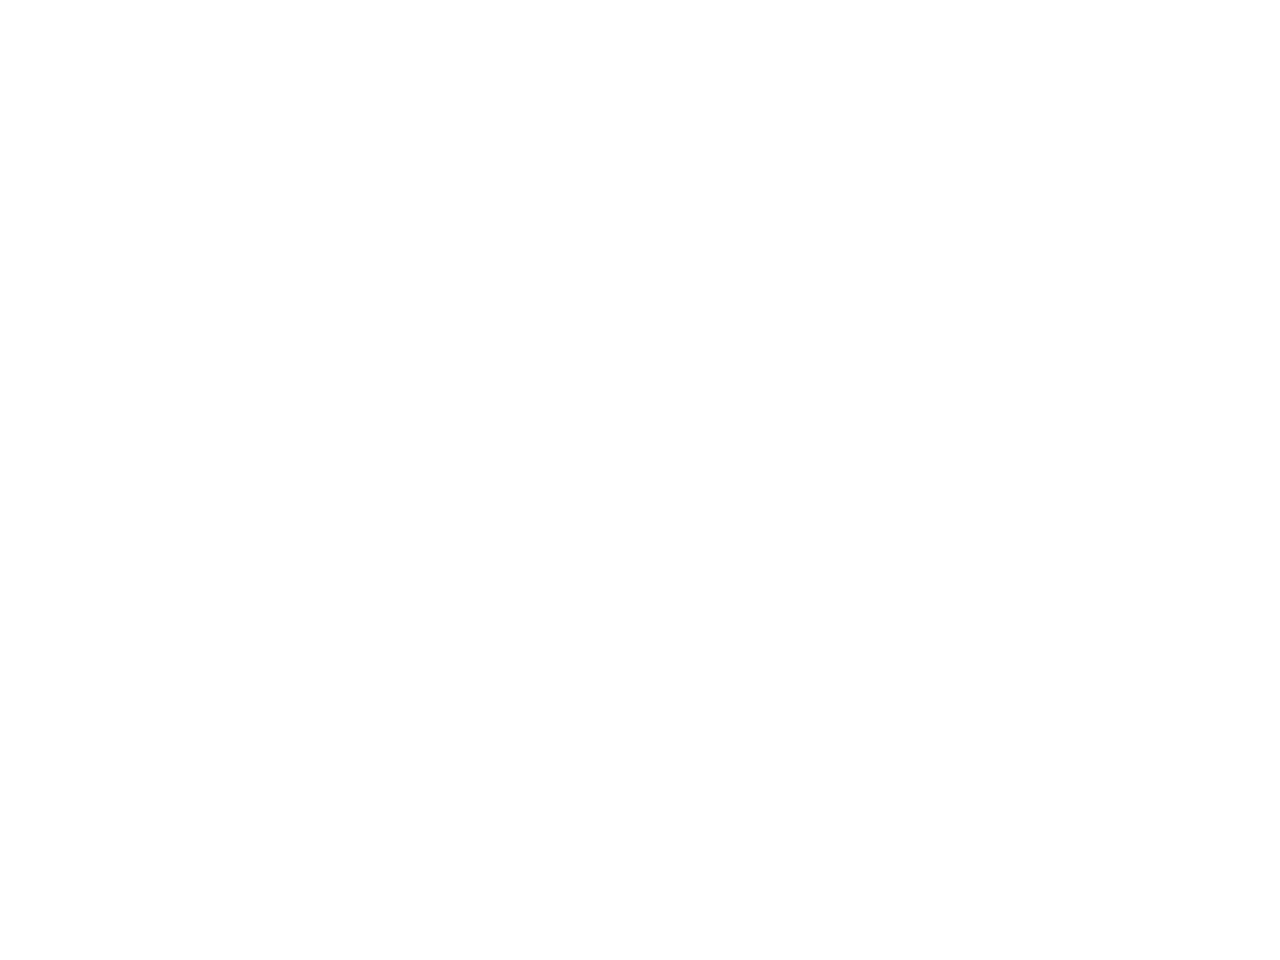

In [140]:
ds5_ag.plot_sort('TYPES_OF_PLANTS', gui = 'qt5')

In [115]:
ds5_ag.plot_sort('TYPES_OF_PLANTS', databases=[],gui='jupyter') 

In [170]:
ds6_ag = ag_sub1.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                '6 months',fdr_method='dsfdr')
bh6_ag = ag_sub1.diff_abundance('ANTIBIOTIC_HISTORY','I have not taken antibiotics in the past year.',
                                '6 months',fdr_method='bhfdr')

In [173]:
print(ds6_ag)
print(bh6_ag)

AmpliconExperiment ag.biom with 10085 samples, 449 features
AmpliconExperiment ag.biom with 10085 samples, 384 features


In [174]:
ds6_ag.sample_metadata.ANTIBIOTIC_HISTORY.value_counts()

I have not taken antibiotics in the past year.    5056
Year                                              1112
6 months                                           974
Month                                              243
Unknown                                            211
Week                                               169
Unspecified                                         90
Name: ANTIBIOTIC_HISTORY, dtype: int64

In [175]:
ds7_ag = ag_sub1.diff_abundance('TYPES_OF_PLANTS',['More than 30', '21 to 30'],
                                ['Less than 5', '6 to 10'],fdr_method='dsfdr')
bh7_ag = ag_sub1.diff_abundance('TYPES_OF_PLANTS',['More than 30', '21 to 30'],
                                ['Less than 5', '6 to 10'], fdr_method='bhfdr')

In [176]:
print(ds7_ag)
print(bh7_ag)

AmpliconExperiment ag.biom with 10085 samples, 554 features
None


In [182]:
ds7_ag.sample_metadata.TYPES_OF_PLANTS.value_counts()

Unknown         3085
nan             2230
11 to 20        1660
6 to 10         1187
21 to 30         848
More than 30     573
Less than 5      359
Unspecified      143
Name: TYPES_OF_PLANTS, dtype: int64

In [180]:
ds7_ag2 = ds7_ag.filter_samples('TYPES_OF_PLANTS',['More than 30', '21 to 30','Less than 5', '6 to 10'])

<IPython.core.display.Javascript object>


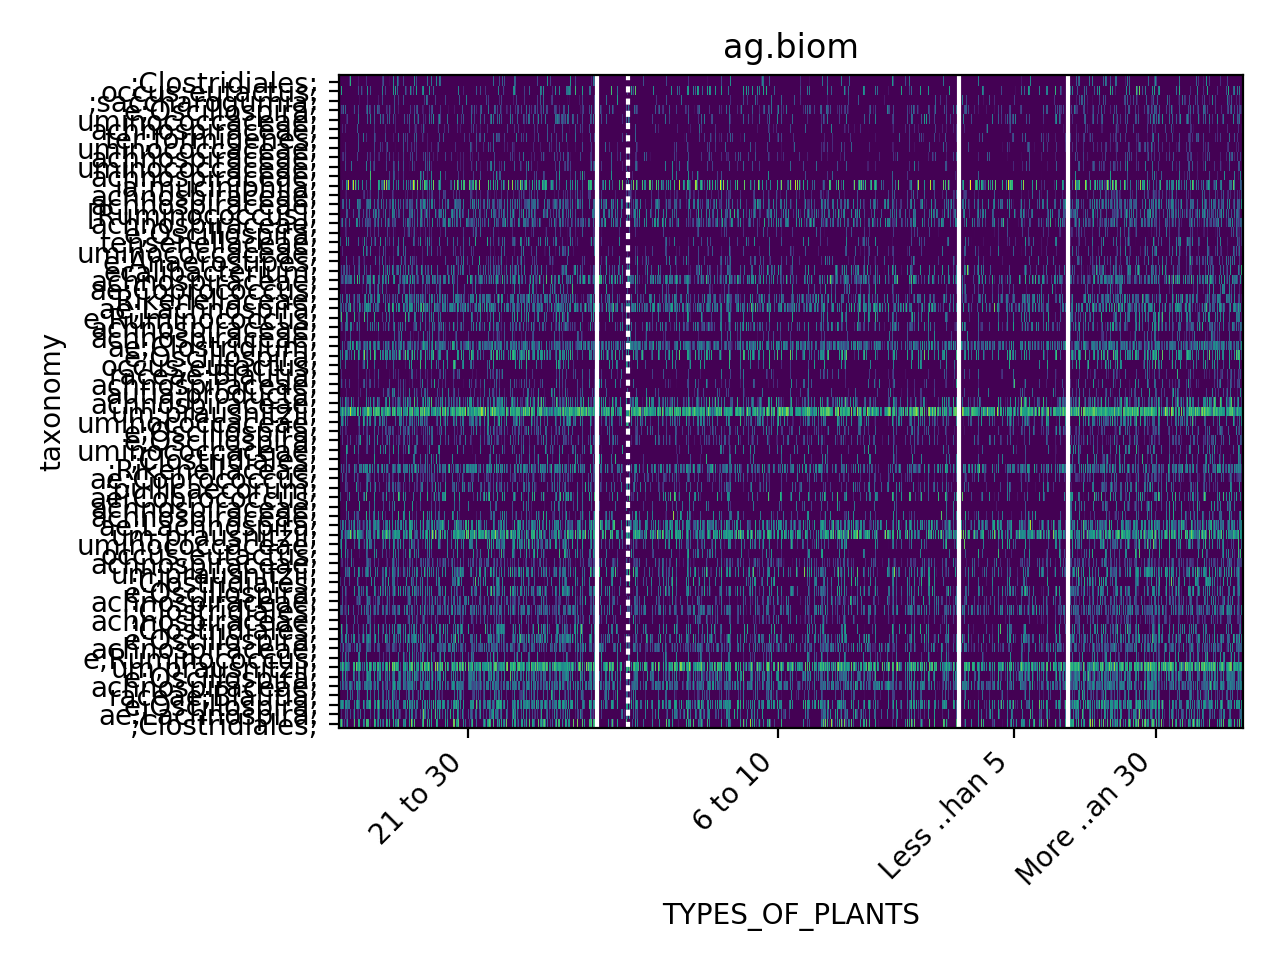

In [181]:
ds7_ag2.sample_metadata['TYPES_OF_PLANTS']=ds7_ag2.sample_metadata['TYPES_OF_PLANTS'].astype(str)
ds7_ag2.plot_sort('TYPES_OF_PLANTS', databases=[],gui='jupyter') 